<a href="https://colab.research.google.com/github/tbyatkdc/Housing-Prices-in-CDMX/blob/main/Housing_Data_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis y predicción del Precio de Vivienda en CDMX**
By:Brandon Yahir Arriaga Tlapa

**Fuente del Dataset:** Kaggle\
**Objetivo:** explorar, limpiar y analizar el mercado inmobiliario en la CDMX.\
**Descripción del conjunto de datos:**

Este conjunto de datos proporciona una instantánea de los precios de la vivienda en la Ciudad de México (CDMX), recopilada durante un período en el que el peso mexicano se cotizaba aproximadamente a 18.80 frente al dólar estadounidense. Ofrece una visión clara del mercado inmobiliario residencial en la CDMX, un centro urbano dinámico e influyente. Los datos incluyen variables clave como el tipo de propiedad, la ubicación específica dentro de la ciudad, detalles de precios y superficie. Esta combinación permite un análisis preciso de cómo estas características clave influyen en el valor de las propiedades en una importante metrópolis latinoamericana bajo condiciones económicas específicas.



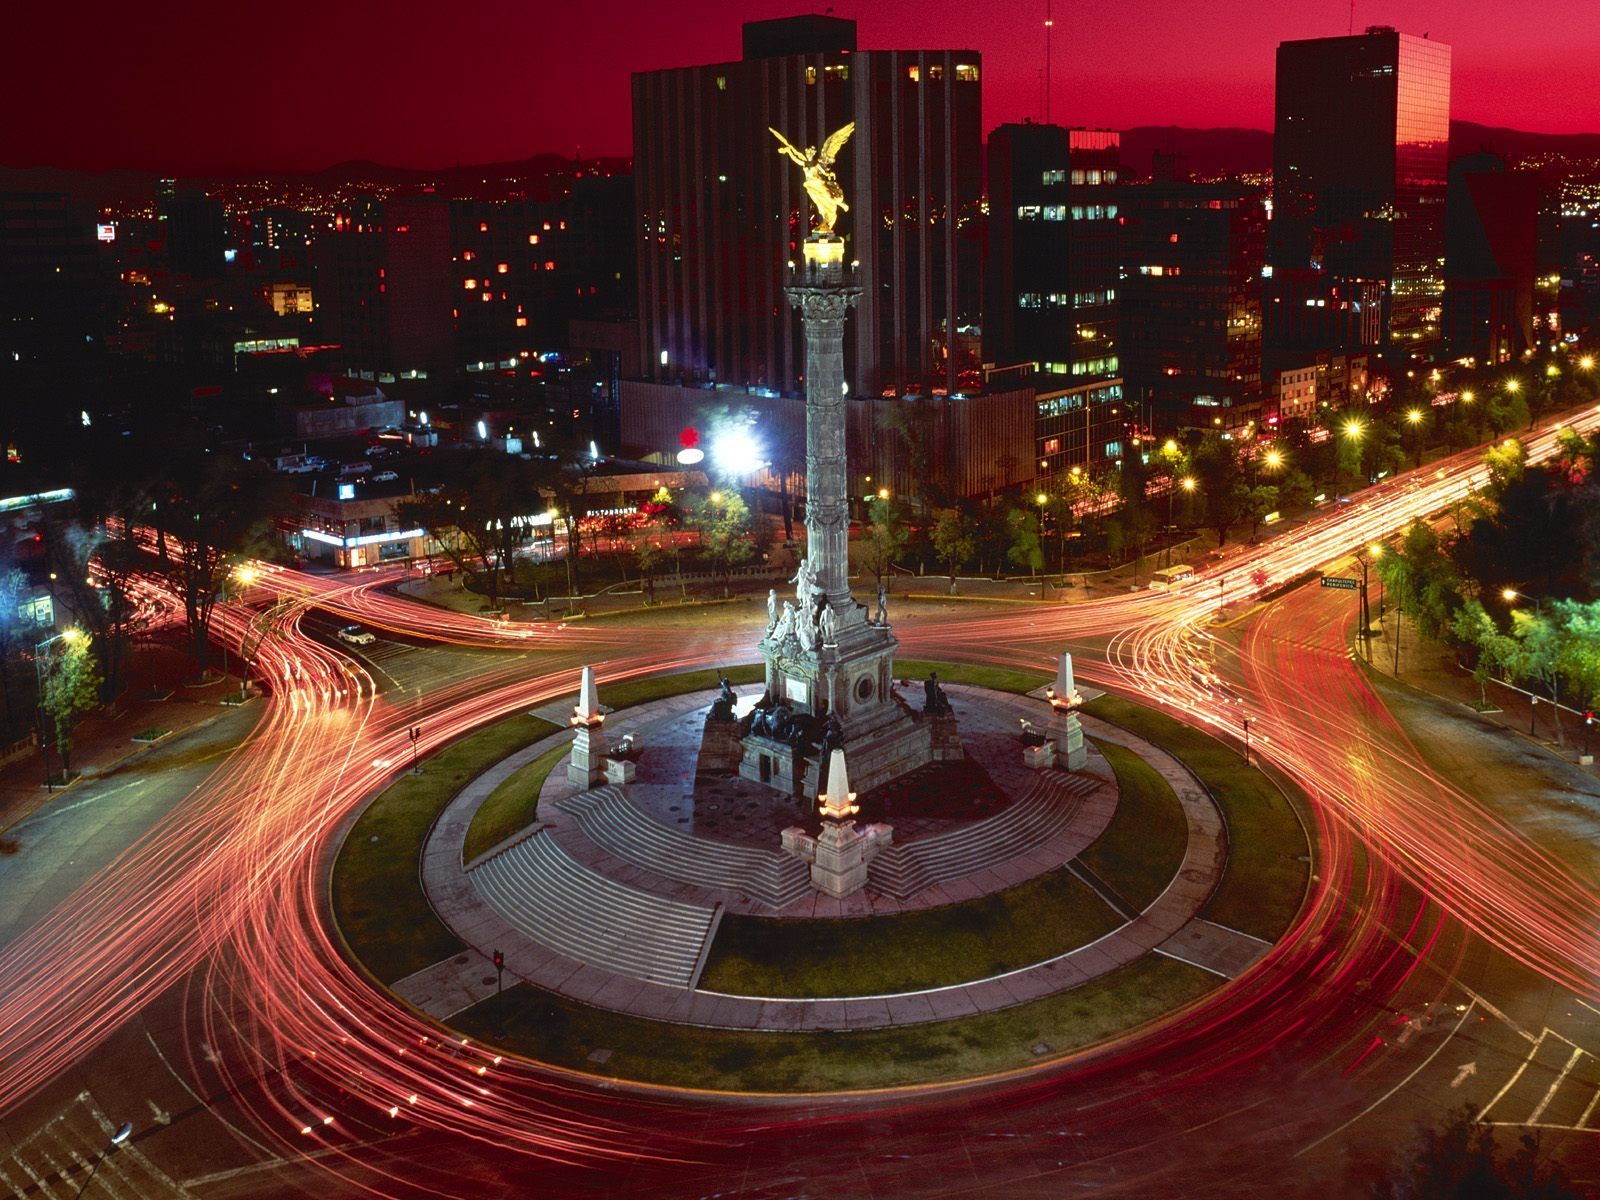

In [238]:
pip install plotnine

In [239]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import mizani.formatters as fmt

---
---
PARTE 1)
## **Una vez que los datos han sido explorados y limpiados mediante PostgreSQL, los exportamos y preparamos en nuestro entorno de trabajo en python:**
---
---

In [240]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyectos/Project_01/Data/housing_data_CDMX_v2.csv")


In [241]:


data["property_type"] = data["property_type"].str.lower().str.strip()


traductor = {
    "apartment": "partamento",
    "house": "Casa",
    "store": "Local",
    "ph": "Penthouse"
}


data["property_type"] = data["property_type"].map(traductor)
data = data.rename(columns={"property_type": "tipo_propiedad"})
data

,tipo_propiedad,places,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,lat,lon
0,partamento,MiguelHidalgo,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,54.0,54.0,5366.215926,101851.851900,23.634501,-102.552788
1,Casa,Iztapalapa,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,80.0,80.0,995.774500,18900.000000,19.310330,-99.068557
2,partamento,Tlalpan,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,100.0,100.0,488.228200,9266.670000,19.279771,-99.234597
3,partamento,MiguelHidalgo,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,135.0,135.0,2501.632296,47481.481480,23.634501,-102.552788
4,partamento,MiguelHidalgo,"19.432657,-99.177444",4416000.0,MXN,4376051.62,232663.51,87.0,87.0,2674.293218,50758.620690,19.432657,-99.177444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,partamento,Coyoacan,"19.336994,-99.162355",4154400.0,MXN,4116818.02,218880.72,157.0,157.0,1394.144713,26461.146500,19.336994,-99.162355
18230,Casa,AlvaroObregon,"19.342911,-99.224472",706448.0,MXN,700223.15,37229.08,105.0,105.0,354.562667,6728.076190,19.342911,-99.224472
18231,partamento,Cuauhtemoc,"19.408758,-99.129474",621880.0,MXN,616254.29,32764.67,130.0,130.0,252.035923,4783.692308,19.408758,-99.129474
18232,Casa,MiguelHidalgo,"19.401079,-99.24807",13000000.0,MXN,12885453.38,685086.71,316.0,350.0,2167.995918,37142.857140,19.401079,-99.248070


---
---
### **Exploración y descripción de nuestros datos**
---
---

In [242]:
print(data.columns)

Index(['tipo_propiedad', 'places', 'lat-lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'lat',
       'lon'],
      dtype='object')


In [243]:
print("Información sobre nuestros datos")
data.info()

Información sobre nuestros datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18234 entries, 0 to 18233
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tipo_propiedad              18234 non-null  object 
 1   places                      18234 non-null  object 
 2   lat-lon                     18234 non-null  object 
 3   price                       18234 non-null  float64
 4   currency                    18234 non-null  object 
 5   price_aprox_local_currency  18234 non-null  float64
 6   price_aprox_usd             18234 non-null  float64
 7   surface_total_in_m2         18234 non-null  float64
 8   surface_covered_in_m2       18234 non-null  float64
 9   price_usd_per_m2            18234 non-null  float64
 10  price_per_m2                18234 non-null  float64
 11  lat                         18234 non-null  float64
 12  lon                         18234 non-null  float64
dty

In [244]:
print("Nuestro conjunto de datos se construye con", data.shape[0], "Filas y", data.shape[1], "Columnas" )

Nuestro conjunto de datos se construye con 18234 Filas y 13 Columnas


In [245]:

nulls = data.isnull().sum()
nulls_percent = (nulls / len(data) * 100).round(2)


missing_table = pd.DataFrame({
    'Columna': nulls.index,
    'Valores faltantes': nulls.values,
    '% de valores faltantes': nulls_percent.values
})

missing_table = missing_table.sort_values(by='% de valores faltantes', ascending=False)
missing_table.reset_index(drop=True, inplace=True)

missing_table

,Columna,Valores faltantes,% de valores faltantes
0,tipo_propiedad,0,0.0
1,places,0,0.0
2,lat-lon,0,0.0
3,price,0,0.0
4,currency,0,0.0
5,price_aprox_local_currency,0,0.0
6,price_aprox_usd,0,0.0
7,surface_total_in_m2,0,0.0
8,surface_covered_in_m2,0,0.0
9,price_usd_per_m2,0,0.0


---
---
### **Estadística descriptiva de nuestros datos**
---
---

In [246]:
data.describe().T.style.background_gradient(cmap='GnBu',axis=1)

,count,mean,std,min,25%,50%,75%,max
price,18234.000000,3603177.167325,5481584.610148,7000.000000,1055007.500000,2000000.000000,4000000.000000,233726700.000000
price_aprox_local_currency,18234.000000,5085787.630891,9618484.908659,109030.610000,1111025.002500,2269283.890000,4711236.397500,336484065.000000
price_aprox_usd,18234.000000,270398.364340,511390.323958,5796.880000,59070.367500,120652.040000,250484.430000,17890000.000000
surface_total_in_m2,18234.000000,4062.464297,487269.859259,1.000000,67.000000,95.000000,195.000000,65748000.000000
surface_covered_in_m2,18234.000000,4039.937918,487268.628342,1.000000,67.000000,95.000000,200.000000,65748000.000000
price_usd_per_m2,18234.000000,1503.674363,2123.172915,0.000600,677.397586,1108.178255,1897.980198,175917.685571
price_per_m2,18234.000000,24804.092683,40473.411307,0.011377,11571.428570,18828.431370,32732.599432,3338952.857000
lat,18234.000000,19.464292,0.589734,19.185852,19.353288,19.389791,19.428622,41.577487
lon,18234.000000,-99.224840,0.470493,-102.552788,-99.195413,-99.164299,-99.135813,-90.488467


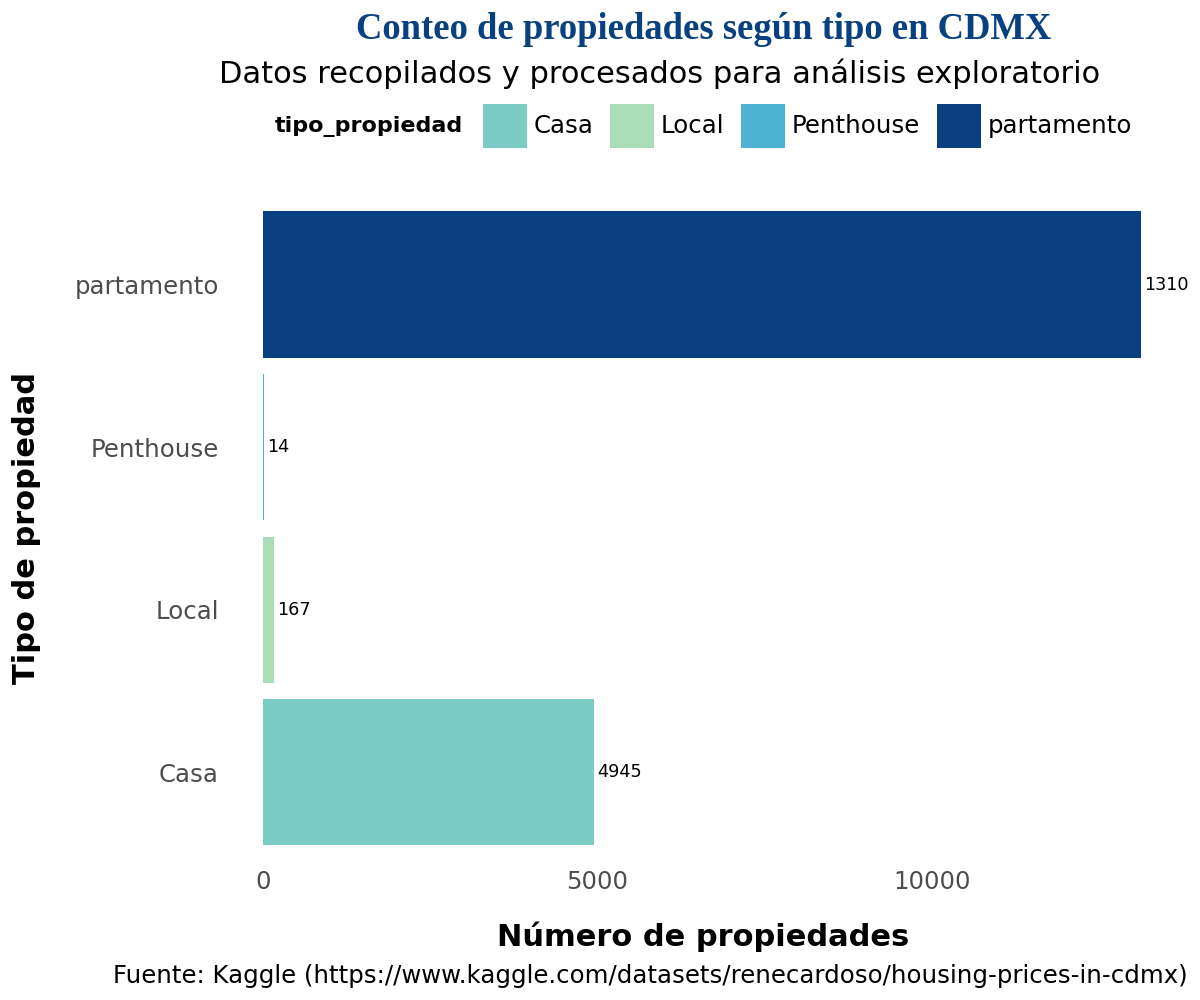

In [247]:

my_palette = ['#7bccc4',
              '#a8ddb5',
              '#4eb3d3',
              '#084081']

(ggplot(data, aes(x="tipo_propiedad", fill="tipo_propiedad")) +
 # Gráfico de barras
 geom_bar() +


 geom_text(
     aes(label=after_stat('count')),
     stat="count",
     va="center", ha="left",size="xx-small",
     nudge_y=50   # mueve el texto un poquito a la derecha
 ) +


 labs(
     title="Conteo de propiedades según tipo en CDMX",
     subtitle="Datos recopilados y procesados para análisis exploratorio",
     x="Tipo de propiedad",
     y="Número de propiedades",
     caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)"
 ) +

 coord_flip() +
 scale_fill_manual(values=my_palette) +
 theme(figure_size=(6, 5),
     legend_position="top",
     legend_title=element_text(face="bold", size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_minor_x=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center",
                             color="#084081", family="Liberation Serif"),
     axis_title_y=element_text(margin={"r": 10}, face="bold"),
     axis_title_x=element_text(margin={"t": 10}, face="bold")
 ))

---
El tipo de propiedad con mayor frecuencia es sin duda los apartamentos con 13108 conteos.
Mientras que el segundo tipo de propiedad con más registros son las casas con 4945 conteos.\
El penthouse es el tipo de propiedad menos frecuente (solo 14 registros), mientras que las tiendas
El conteo específico se encuentra de la siguiente manera:

In [248]:

data["tipo_propiedad"].groupby(data["tipo_propiedad"]).count()


,tipo_propiedad
tipo_propiedad,
Casa,4945
Local,167
Penthouse,14
partamento,13108


In [249]:

#ordenar la cantidad de places segun la frecuencia en la que aparezca el dato en el dataframe
frecuencias = data['places'].value_counts()

auxiliar = frecuencias.index.values

# Convertir la columna a Categorical con ese orden
data['places'] = pd.Categorical(data['places'], categories=auxiliar, ordered=True)


cmap = cm.get_cmap('GnBu', 20)


hex_colors = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
#pasarlo a lista
cmap = list(hex_colors)
cmap=cmap[5:20]

/tmp/ipython-input-2444146132.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


/usr/local/lib/python3.12/dist-packages/plotnine/scales/scale_manual.py:39: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 15 values. 16 were requested from it.


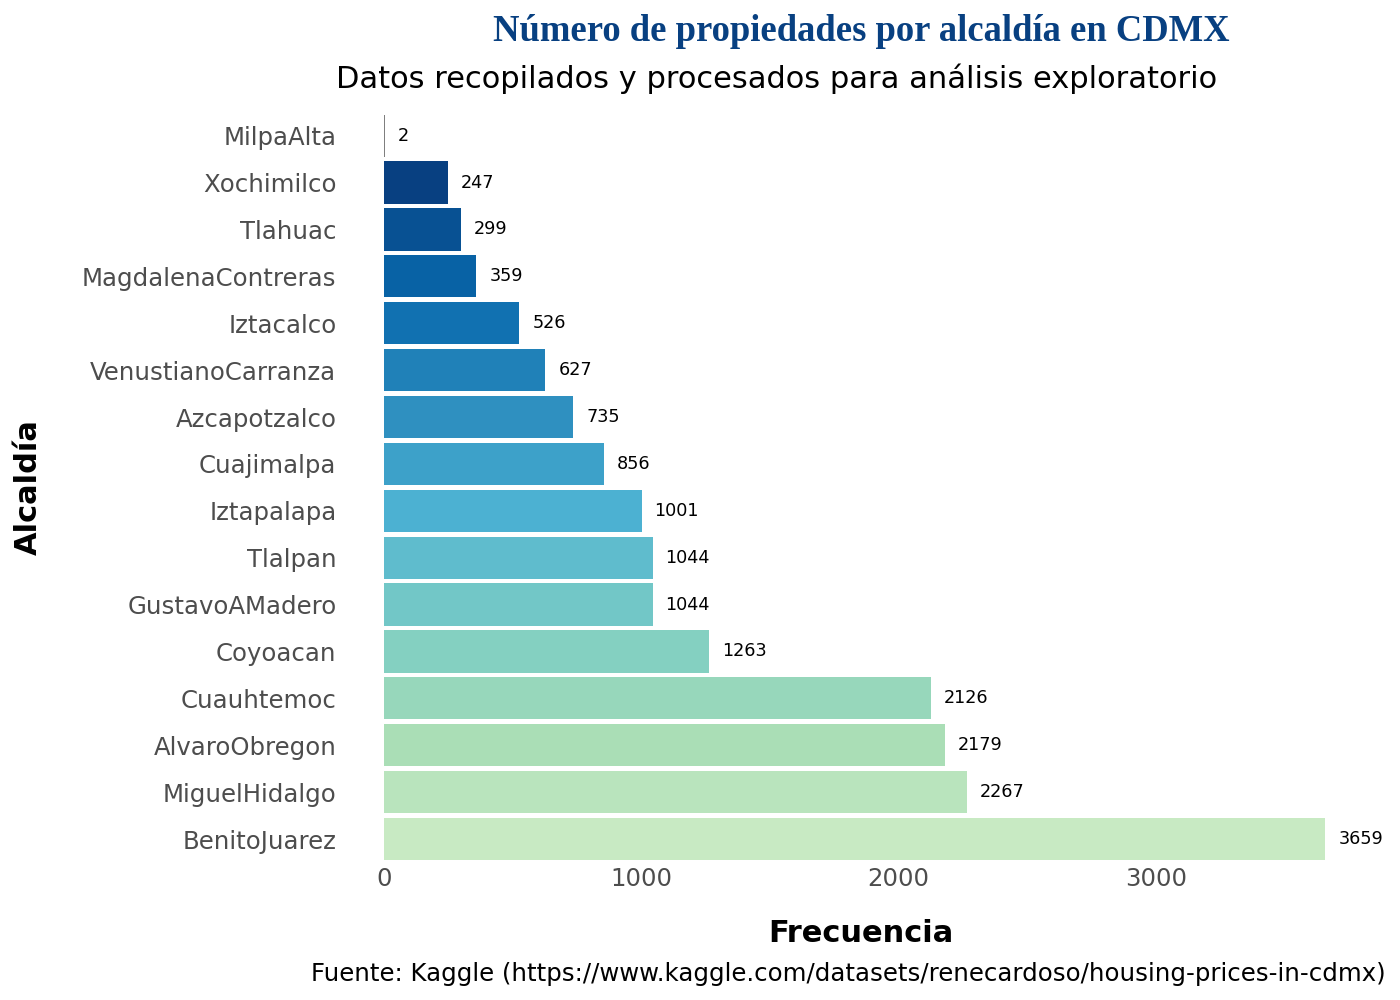

In [250]:
(ggplot(data,mapping=aes(x="places",fill="places"))+geom_bar()+
 labs(title="Número de propiedades por alcaldía en CDMX",
            x="Alcaldía",
            y="Frecuencia",subtitle="Datos recopilados y procesados para análisis exploratorio",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+
 coord_flip()+ geom_text(
     aes(label=after_stat('count')),
     stat="count",
     va="center", ha="left",size="xx-small",
     nudge_y=50)+   # mueve el texto un poquito a la derecha
 scale_fill_manual(values=cmap)+
 theme(figure_size=(7, 5),legend_position="none",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold")))

---
Sin duda alguna, la alcaldía Benito Juárez representa el lugar dentro de la CDMX con mayor número de propiedades según nuestros datos, mientras que las alcaldías Miguel Hidalgo, Álvaro Obregón y Cuauhtémoc comparten un espacio muy similar en el conteo de propiedades por ubicación.

---

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 74'. Pick better value with 'binwidth'.


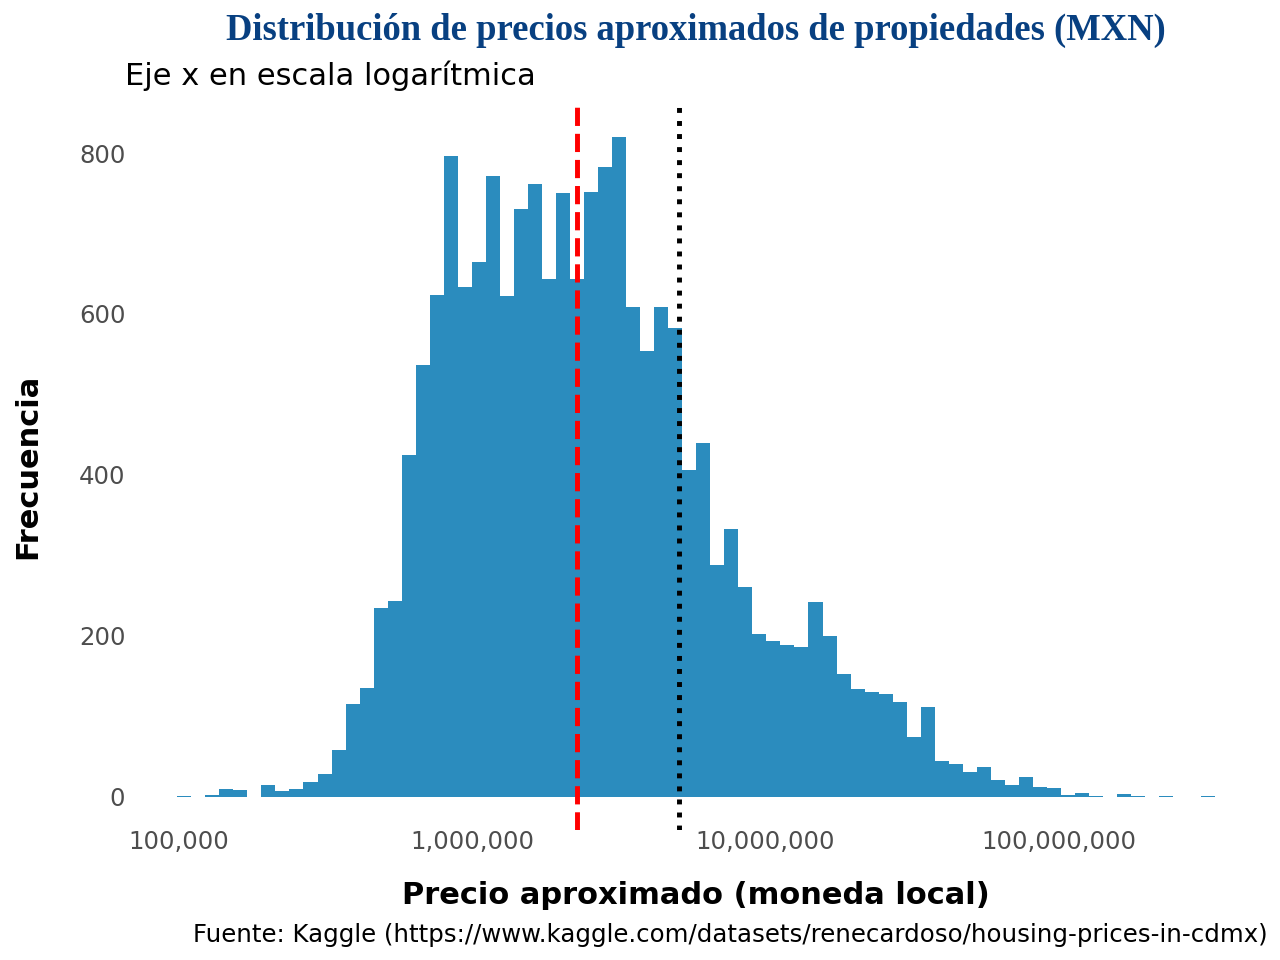

In [251]:


(ggplot(data,mapping=aes(x="price_aprox_local_currency"))+geom_histogram(fill="#2b8cbe")+ scale_x_log10(labels=fmt.comma_format())+ labs(title="Distribución de precios aproximados de propiedades (MXN)",
            x="Precio aproximado (moneda local)",
            y="Frecuencia",subtitle="Eje x en escala logarítmica",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")
+geom_vline(xintercept=data["price_aprox_local_currency"].median(),
             linetype="dashed", color="red", size=1)
+ geom_vline(xintercept=data["price_aprox_local_currency"].mean(),
             linetype="dotted", color="black", size=1)+theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold")))

#### **Distribución de precios de propiedades en CDMX**

El histograma anterior muestra la distribución de los precios aproximados de propiedades en la Ciudad de México, expresados en pesos mexicanos (MXN). Para mejorar la visualización de los valores extremos, el eje X se representó en escala logarítmica.


*   La mediana (línea roja discontinua) indica el punto en el que el 50% de las propiedades cuestan menos y el 50% más.
*   La media (línea negra punteada) es mayor que la mediana, lo que confirma que la distribución está sesgada a la derecha (muchas propiedades con precios bajos y unas pocas muy caras que elevan el promedio).

* Esto es común en el mercado inmobiliario: la mayoría de propiedades se concentran en un rango accesible, mientras que un número reducido de propiedades de lujo tienen valores muy elevados.

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 247'. Pick better value with 'binwidth'.


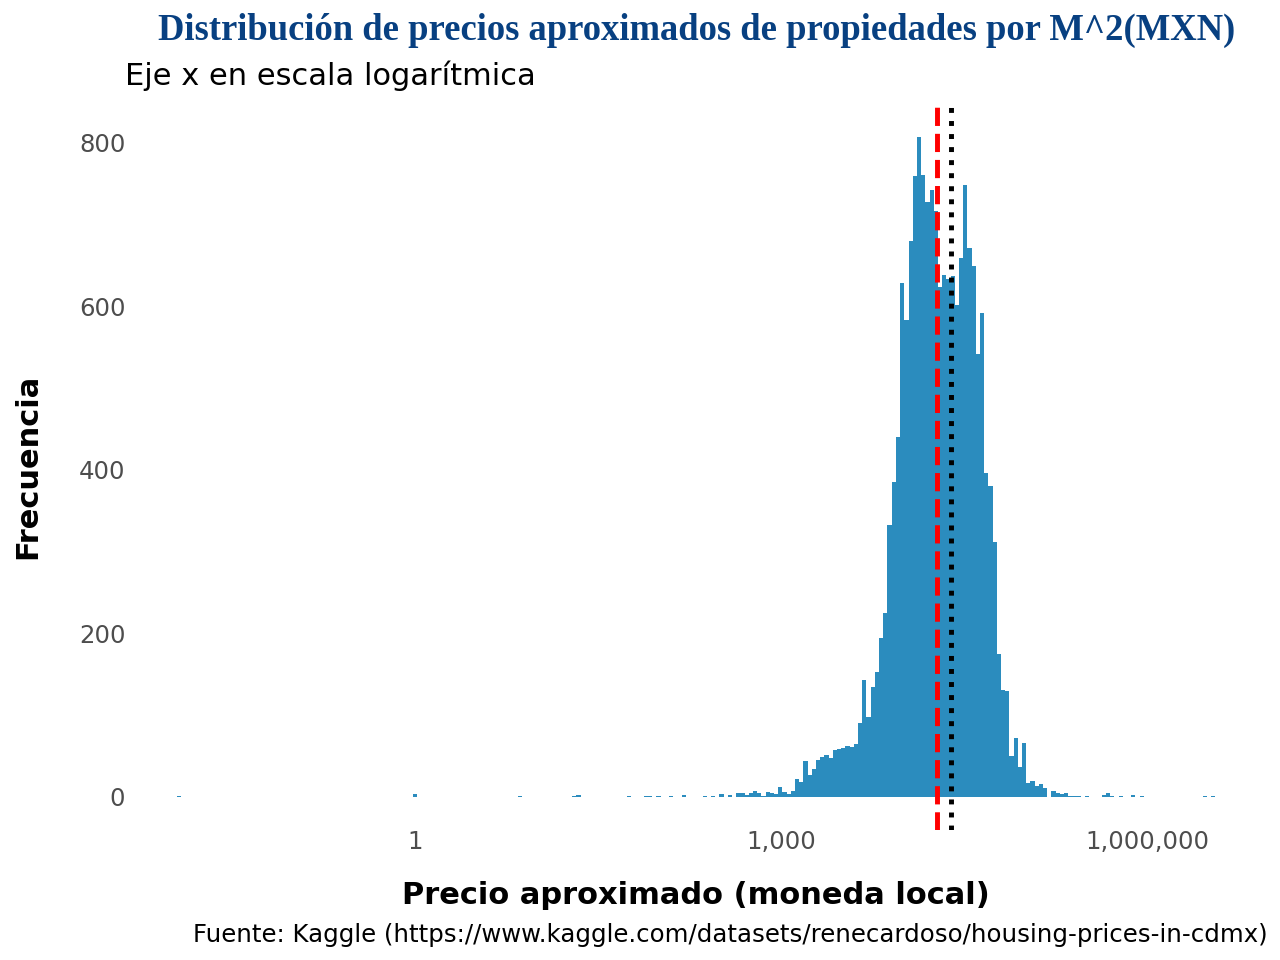

In [252]:
(ggplot(data,mapping=aes(x="price_per_m2"))+geom_histogram(fill="#2b8cbe")+ scale_x_log10(labels=fmt.comma_format())+
 labs(title="Distribución de precios aproximados de propiedades por M^2(MXN)",
            x="Precio aproximado (moneda local)",
            y="Frecuencia",subtitle="Eje x en escala logarítmica",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+geom_vline(xintercept=data["price_per_m2"].median(),
             linetype="dashed", color="red", size=1)
+ geom_vline(xintercept=data["price_per_m2"].mean(),
             linetype="dotted", color="black", size=1)+theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold")))

#### **Distribución de precios de propiedades por metro cuadrado en CDMX**

El histograma anterior muestra la distribución de los precios aproximados de propiedades por metro cuadrado en la Ciudad de México, expresados en pesos mexicanos (MXN). Para mejorar la visualización de los valores extremos, el eje X se representó en escala logarítmica.


*   La mediana (línea roja discontinua) indica el punto en el que el 50% de las propiedades cuestan menos y el 50% más.
*   La media (línea negra punteada) es mayor que la mediana, lo que confirma que la distribución está sesgada a la derecha (tal como el caso anterior).

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 222'. Pick better value with 'binwidth'.


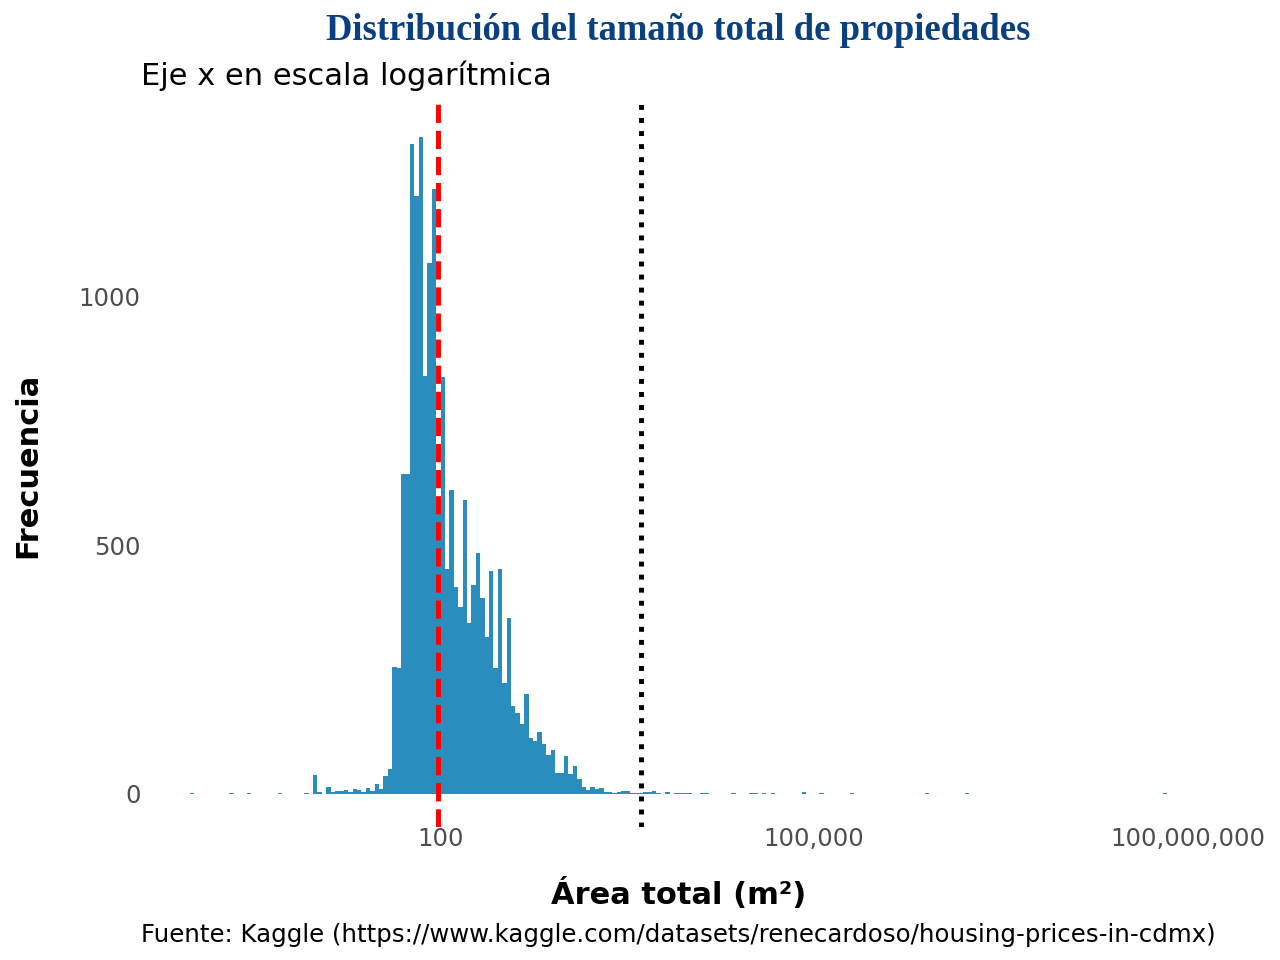

In [253]:
(ggplot(data,mapping=aes(x="surface_total_in_m2"))+geom_histogram(fill="#2b8cbe")+scale_x_log10(labels=fmt.comma_format())+labs(title="Distribución del tamaño total de propiedades",
            x="Área total (m²)",
            y="Frecuencia",subtitle="Eje x en escala logarítmica",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")
+geom_vline(xintercept=data["surface_total_in_m2"].median(),
             linetype="dashed", color="red", size=1)
+ geom_vline(xintercept=data["surface_total_in_m2"].mean(),
             linetype="dotted", color="black", size=1)+theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold")))

#### **Distribución del tamaño total de propieadedes en m^2**

El histograma anterior muestra la distribución de áreas totales de las propieades en metros cuadrados en la Ciudad de México. Para mejorar la visualización de los valores extremos, el eje X se representó en escala logarítmica.


*   La mediana (línea roja discontinua) indica el punto en el que el 50% de las propiedades cuestan menos y el 50% más.
*   La media (línea negra punteada) es mayor que la mediana, lo que confirma que la distribución está sesgada a la derecha, esto quiere decir que, existen propiedades de cierto tipo que cubren un mayor área total, lo que se traduce a propiedades de mayor costo pero relativamente en menor cantidad (se visualiza en el histograma a medida que avanzamos en el eje x).

---
---
### **Estadísticas resumidas por grupos y relaciones categóricas y numéricas**
---
---

/tmp/ipython-input-2083428456.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


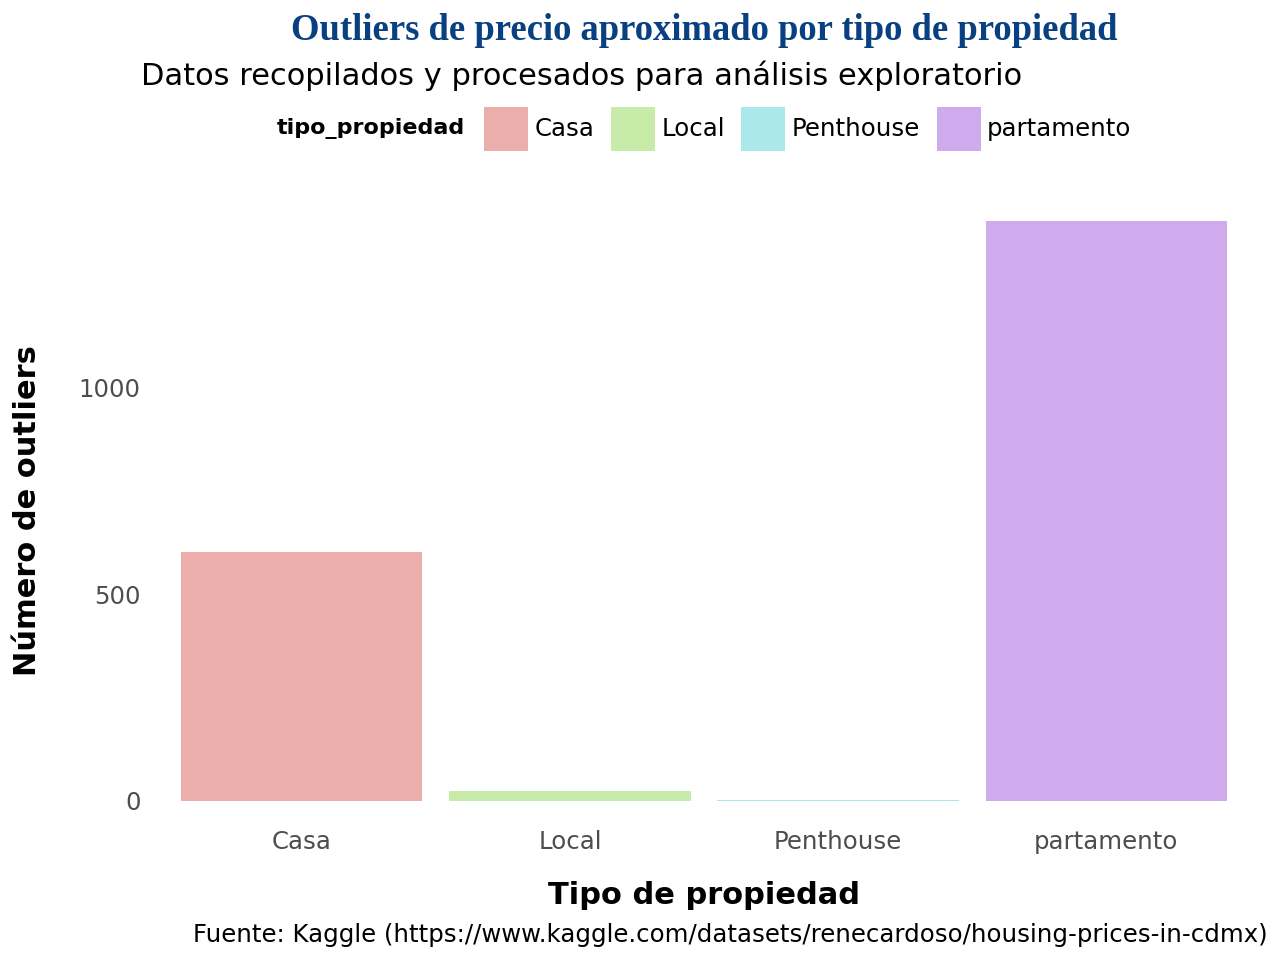

In [254]:
def marcar_outliers(grupo):
    Q1 = grupo['price_aprox_local_currency'].quantile(0.25)
    Q3 = grupo['price_aprox_local_currency'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    grupo['es_outlier'] = (grupo['price_aprox_local_currency'] < lower_bound) | \
                          (grupo['price_aprox_local_currency'] > upper_bound)
    return grupo


data_outliers = data.groupby('tipo_propiedad', group_keys=False).apply(marcar_outliers)

outlier_counts = data_outliers.groupby('tipo_propiedad')['es_outlier'].sum().reset_index()


(
    ggplot(outlier_counts, aes(x='tipo_propiedad', y='es_outlier', fill='tipo_propiedad')) +
    geom_bar(stat='identity', alpha=0.5) +
    labs(title="Outliers de precio aproximado por tipo de propiedad",
         x='Tipo de propiedad',
         y='Número de outliers',subtitle="Datos recopilados y procesados para análisis exploratorio",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)") +
    theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold")))


In [255]:
stats_property = data.groupby('tipo_propiedad')['price_aprox_local_currency'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).reset_index()


stats_property_formatted = stats_property.copy()
for col in ['mean', 'median', 'std', 'min', 'max']:
    stats_property_formatted[col] = stats_property_formatted[col].apply(lambda x: f"${x:,.0f}")


stats_property_formatted

,tipo_propiedad,count,mean,median,std,min,max
0,Casa,4945,"$7,689,111","$3,494,594","$13,087,506","$274,720","$336,484,065"
1,Local,167,"$9,543,448","$3,815,172","$18,460,906","$109,031","$117,431,580"
2,Penthouse,14,"$14,167,758","$10,802,610","$11,345,843","$3,470,679","$42,448,828"
3,partamento,13108,"$4,037,190","$1,753,988","$7,459,672","$131,660","$231,612,345"


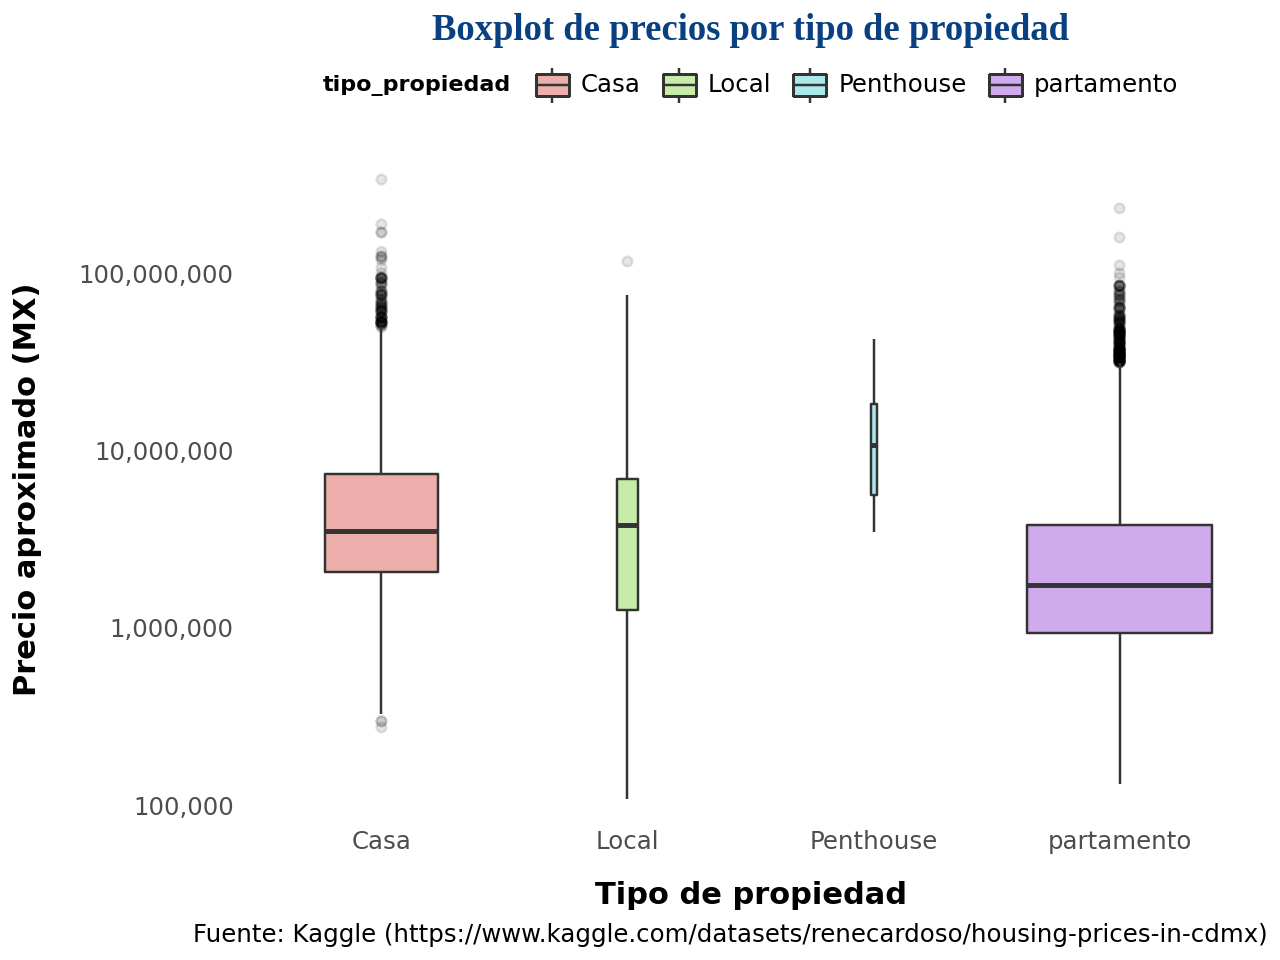

In [256]:
(ggplot(data, aes(x="tipo_propiedad", y="price_aprox_local_currency", fill="tipo_propiedad")) +
    geom_boxplot(varwidth=True, outlier_alpha=0.1, alpha=0.5, outlier_color="black") +
    scale_y_log10(labels=fmt.comma_format()) + \
    labs(title="Boxplot de precios por tipo de propiedad",
         x="Tipo de propiedad",
         y="Precio aproximado (MX)",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")
    +theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold")))


---

**Hallazgos del boxplot de precios por tipo de propiedad:**

- Los departamentos (`apartment`) tienen un rango de precios más amplio que las casas (`house`), indicando mayor variabilidad (además de que esta variabilidad podría ser explicada por el número de outliers en esta variable).
- La mediana de las casas es más alta que la de los apartamentos, lo que sugiere que en promedio son más caros.
- Se observan valores extremos (outliers) especialmente en los departamentos/casas, esto puede ser debido a mayor área total de la propiedad, zonas exclusivas o lujo.
- Algunos tipos de propiedad tienen menos datos, lo que podría afectar la interpretación de la dispersión.

---

In [257]:

alcaldias_top = ["BenitoJuarez", "Cuauhtemoc", "MiguelHidalgo", "AlvaroObregon"]
data_top = data[data["places"].isin(alcaldias_top)]
abreviaturas = {
    "BenitoJuarez": "BJ",
    "Cuauhtemoc": "CU",
    "MiguelHidalgo": "MH",
    "AlvaroObregon": "AO"
}
data_top["place_short"] = data_top["places"].map(abreviaturas)

/tmp/ipython-input-3023108466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [258]:

abreviaturas_df = pd.DataFrame({
    "Abreviatura": ["BJ", "CU", "MH", "AO"],
    "Alcaldía": ["BenitoJuarez", "Cuauhtemoc", "MiguelHidalgo", "AlvaroObregon"]
})

display(abreviaturas_df)

,Abreviatura,Alcaldía
0,BJ,BenitoJuarez
1,CU,Cuauhtemoc
2,MH,MiguelHidalgo
3,AO,AlvaroObregon


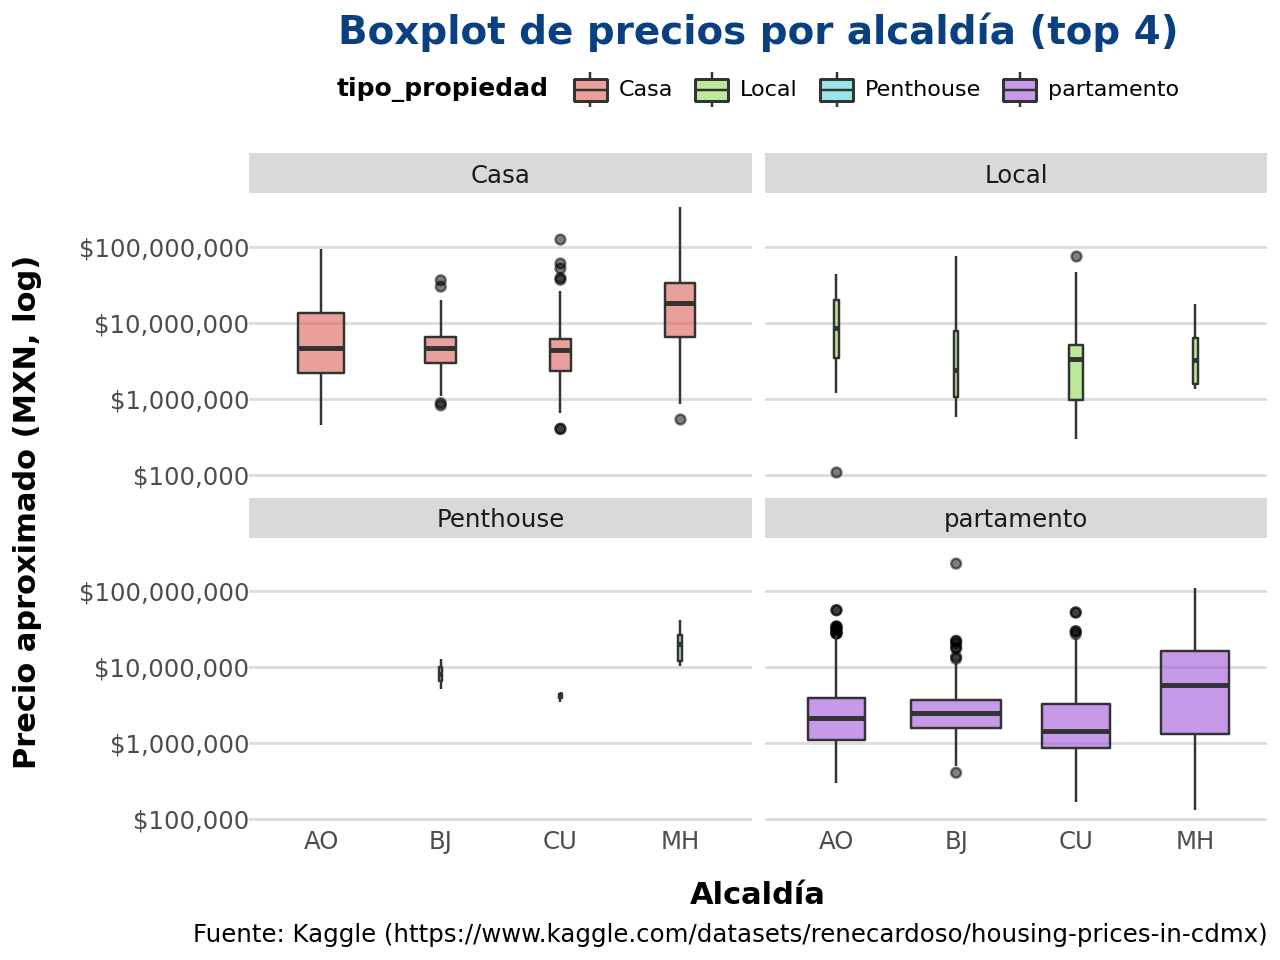

In [259]:
from plotnine import *

(ggplot(data_top, aes(x="place_short", y="price_aprox_local_currency", fill="tipo_propiedad")) +
 geom_boxplot(varwidth=True, outlier_alpha=0.5, alpha=0.6, outlier_color="black") +
 scale_y_log10(labels=lambda l: ["${:,.0f}".format(v) for v in l]) +
 labs(title="Boxplot de precios por alcaldía (top 4)",
      x="Alcaldía",
      y="Precio aproximado (MXN, log)",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)") +
 theme(
     legend_position="top",
     legend_title=element_text(face="bold", size=9),
     legend_text=element_text(size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_major_y=element_line(color="#dcdcdc"),
     panel_grid_minor_y=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center", color="#084081", size=14),
     axis_title_y=element_text(margin={"r":10}, face="bold"),
     axis_title_x=element_text(margin={"t":10}, face="bold")
 ) +
 facet_wrap("~tipo_propiedad")
)

---

**Hallazgos del boxplot de precios por alcaldía (Top 4):**

- **Miguel Hidalgo:** Presenta el rango de precios más amplio tanto para apartamentos como para casas, y sus medianas son las más altas entre las cuatro alcaldías. Esto sugiere que, en promedio, las propiedades en Miguel Hidalgo son las más caras.

- **Cuauhtémoc:** Muestra precios más bajos en comparación con las demás alcaldías, especialmente en apartamentos, indicando un rango más económico de propiedades.

- **Benito Juárez:** Mantiene un rango de precios relativamente constante para apartamentos y casas, aunque presenta una cantidad notable de valores atípicos.

- **Álvaro Obregón:** Destaca por la ausencia de valores extremos en casas y un rango amplio de precios; además, es la segunda alcaldía con menor rango de precios en apartamentos, después de Cuauhtémoc.
---

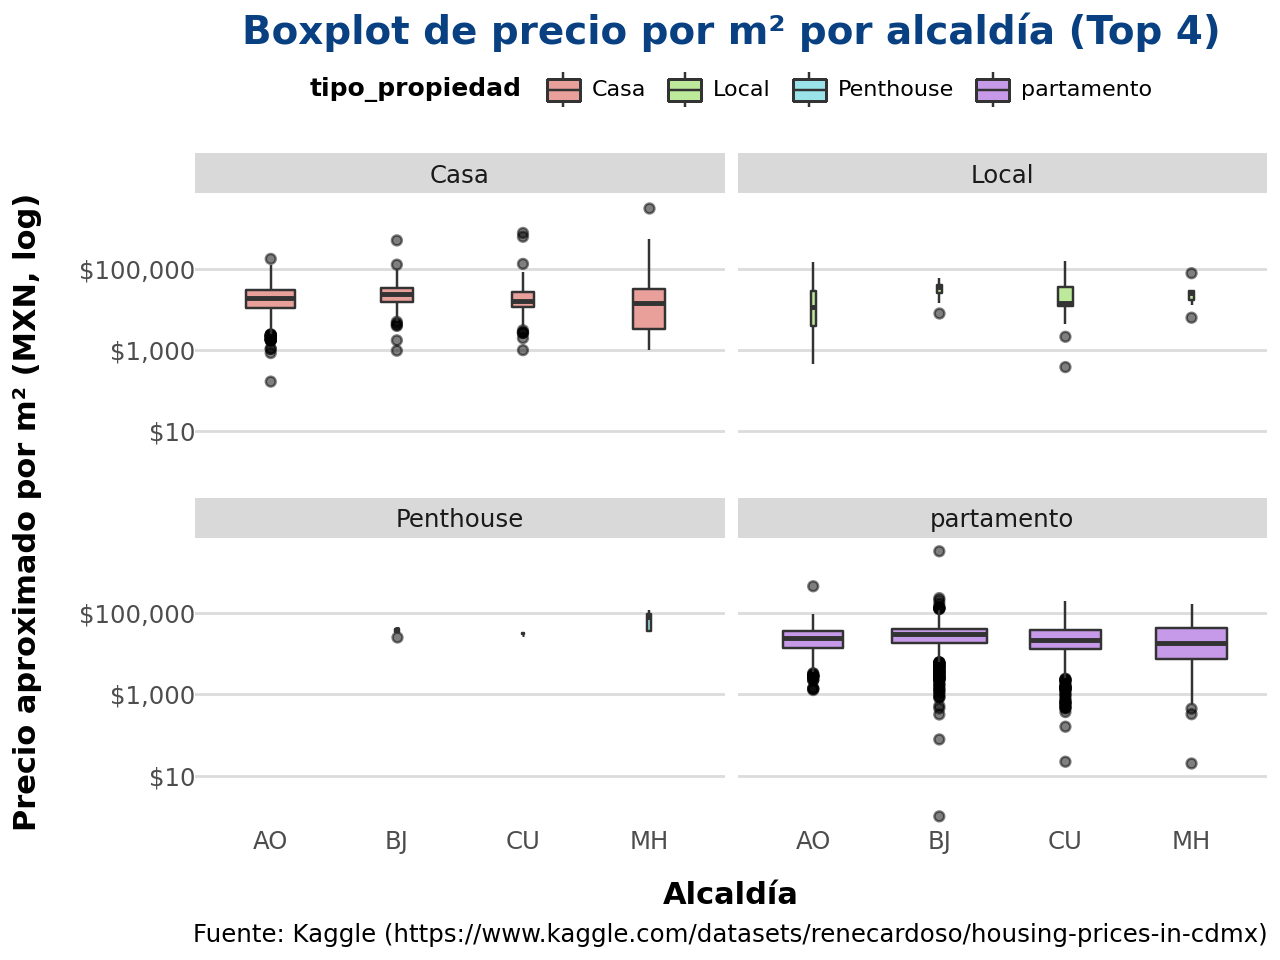

In [260]:
from plotnine import *

(ggplot(data_top, aes(x="place_short", y="price_per_m2", fill="tipo_propiedad")) +
 geom_boxplot(varwidth=True, outlier_alpha=0.5, alpha=0.6, outlier_color="black") +
 scale_y_log10(labels=lambda l: ["${:,.0f}".format(v) for v in l]) +
 labs(title="Boxplot de precio por m² por alcaldía (Top 4)",
      x="Alcaldía",
      y="Precio aproximado por m² (MXN, log)",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)") +
 theme(
     legend_position="top",
     legend_title=element_text(face="bold", size=9),
     legend_text=element_text(size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_major_y=element_line(color="#dcdcdc"),
     panel_grid_minor_y=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center", color="#084081", size=14),
     axis_title_y=element_text(margin={"r":10}, face="bold"),
     axis_title_x=element_text(margin={"t":10}, face="bold")
 ) +
 facet_wrap("~tipo_propiedad")
)

---
**Hallazgos del boxplot de precio por m² por alcaldía (Top 4)**
- **Benito Juárez** Tiene el precio por metro cuadrado ligeramente más alto en promedio tanto para apartamentos como para casas, con un rango menos amplio y varios valores atípicos. Esto indica que es una alcaldía cara por unidad de área.

- **Cuauhtémoc:** Presenta precios por metro cuadrado más bajos y un rango relativamente estrecho, especialmente en apartamentos, mostrando que es más económico comparado con las otras alcaldías.

- **Miguel Hidalgo:** Sorprendentemente, los precios por metro cuadrado en casas y apartamentos mantienen un rango menor que en las demás alcaldías. En apartamentos se observa una cantidad notable de valores atípicos con precios bajos por unidad de área.

- **Álvaro Obregón:** Los precios por m² son moderados y el rango es amplio en casas, mientras que en apartamentos es más estrecho, siendo la tercera alcaldía más económica  por unidad de área después de Cuauhtémoc y Miguel Hidalgo.
---

---
---
### **Distribuciones a mayor detalle (por subgrupos y alcaldía)**
---
---

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


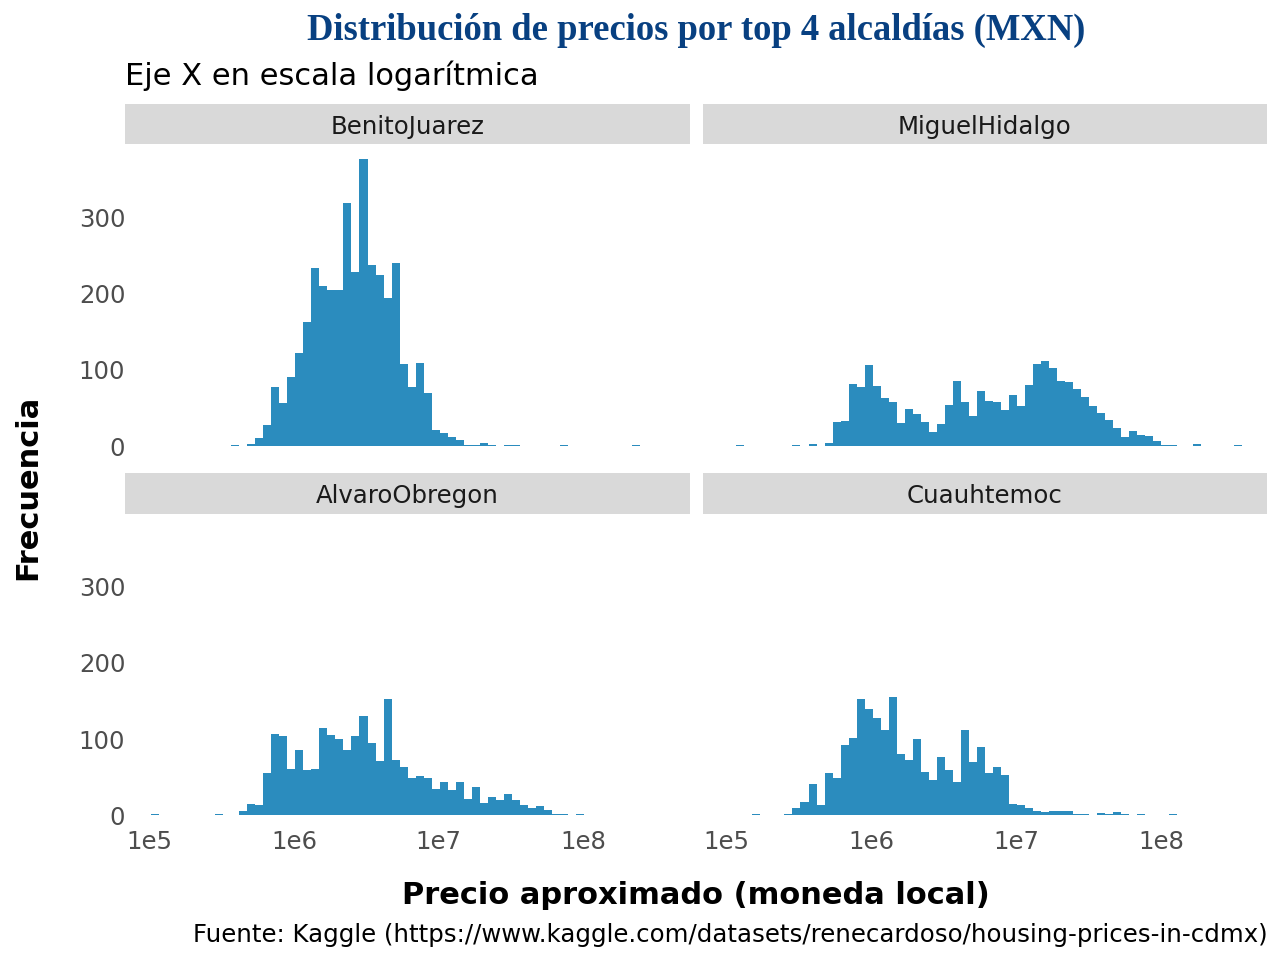

In [261]:
(ggplot(data_top,mapping=aes(x="price_aprox_local_currency"))+geom_histogram(fill="#2b8cbe")+ scale_x_log10()+ labs(title="Distribución de precios por top 4 alcaldías (MXN)",
            x="Precio aproximado (moneda local)",
            y="Frecuencia",subtitle="Eje X en escala logarítmica",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold"))+facet_wrap("~places"))

---

La escala logarítmica permite observar mejor la distribución de precios, especialmente cuando hay propiedades extremadamente caras que de otro modo comprimirían la gráfica.

Las facetas permiten detectar alcaldías con mayor concentración de propiedades caras o baratas y comparar patrones entre ellas.

**La alcaldía Benito Juárez** presenta precios más homogéneos (y elevados) , mientras que las restantes muestran mayor dispersión.

---

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


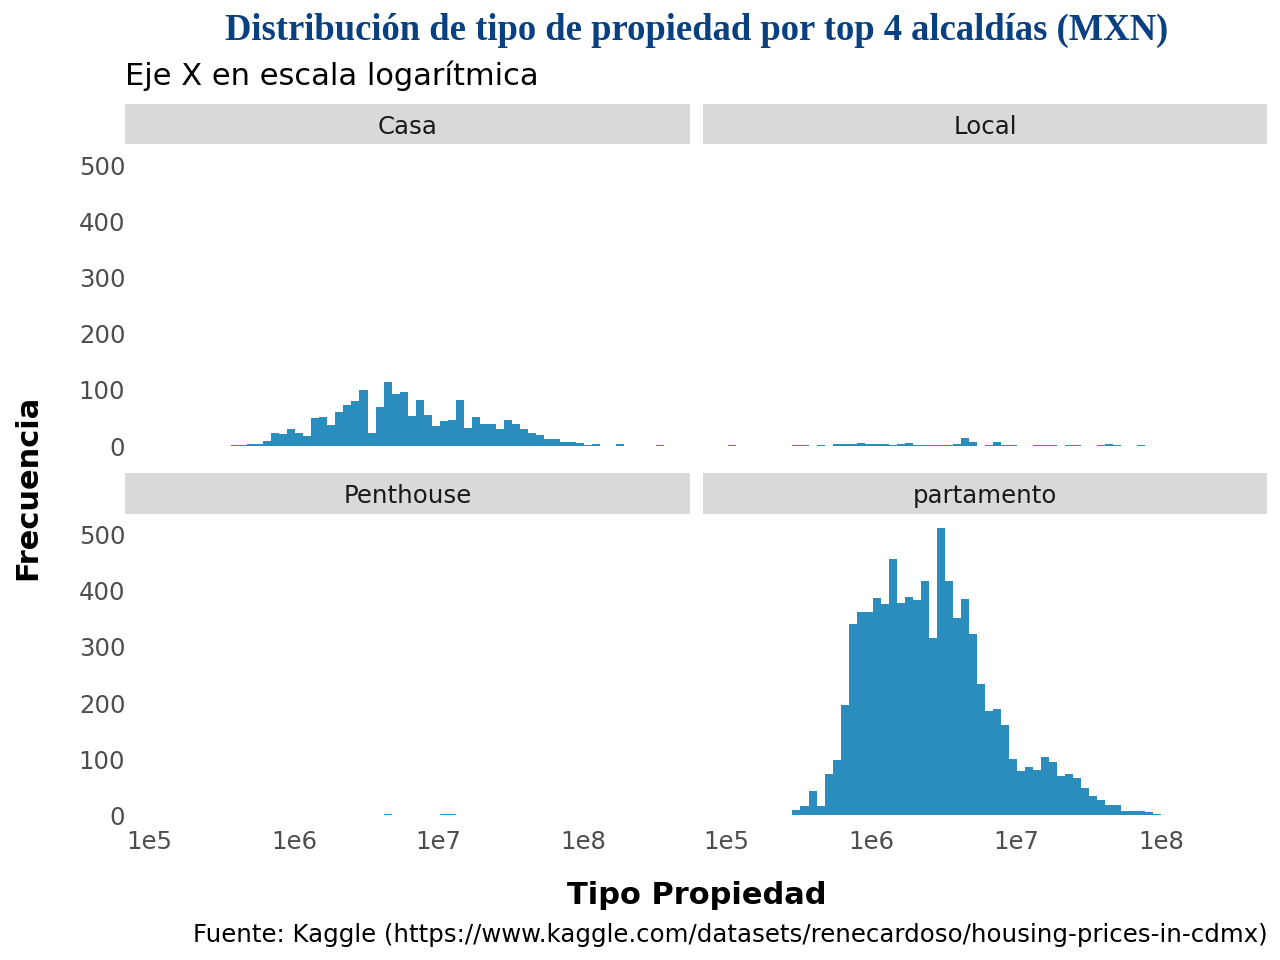

In [262]:
(ggplot(data_top,mapping=aes(x="price_aprox_local_currency"))+geom_histogram(fill="#2b8cbe")+ scale_x_log10()+ labs(title="Distribución de tipo de propiedad por top 4 alcaldías (MXN)",
            x="Tipo Propiedad",
            y="Frecuencia",subtitle="Eje X en escala logarítmica",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")
+theme(legend_position="top",
             legend_title=element_text(face="bold",
                                       size=8),
             legend_key=element_blank(),
             panel_background=element_rect(fill="white"),
             panel_grid_minor_x=element_blank(),
             axis_ticks=element_blank(),
             plot_title=element_text(face="bold",
                                     ha="center",
                                     color="#084081",family="Liberation Serif"),
             axis_title_y=element_text(margin={"r": 10},
                                       face="bold"),
             axis_title_x=element_text(margin={"t": 10},
                                       face="bold"))+facet_wrap("~tipo_propiedad"))

---
---
### **Relaciones entre variables numéricas**
---
---

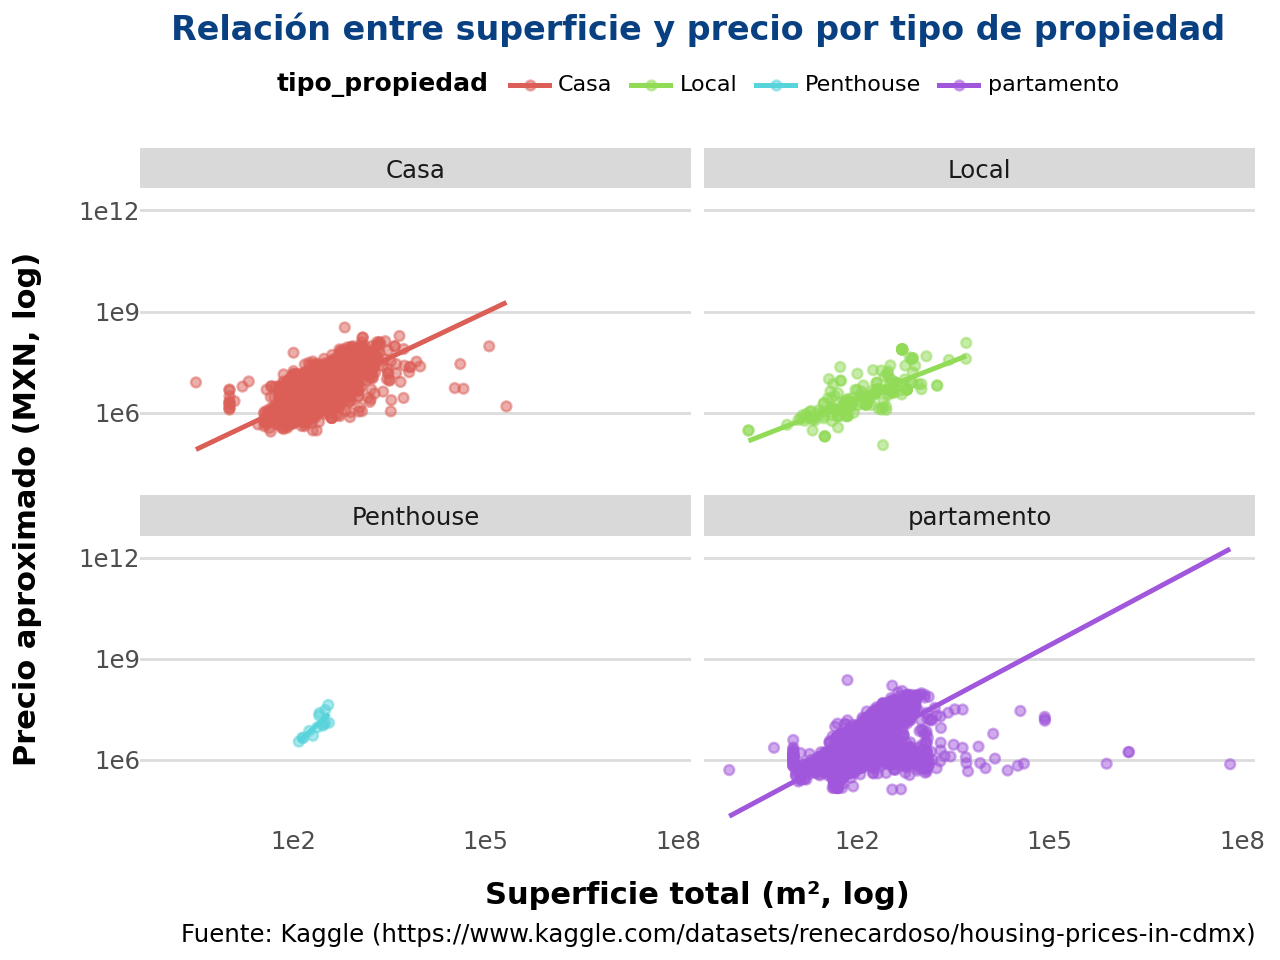

In [263]:
(ggplot(data, aes(x="surface_total_in_m2", y="price_aprox_local_currency", color="tipo_propiedad")) + \
    geom_point(alpha=0.5) + \
    geom_smooth(method="lm", se=False) + \
    scale_y_log10() + scale_x_log10() + \
    labs(title="Relación entre superficie y precio por tipo de propiedad",
         x="Superficie total (m², log)", y="Precio aproximado (MXN, log)",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+
 theme(
     legend_position="top",
     legend_title=element_text(face="bold", size=9),
     legend_text=element_text(size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_major_y=element_line(color="#dcdcdc"),
     panel_grid_minor_y=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center", color="#084081", size=12),
     axis_title_y=element_text(margin={"r":10}, face="bold"),
     axis_title_x=element_text(margin={"t":10}, face="bold")
 )+facet_wrap("tipo_propiedad"))
#

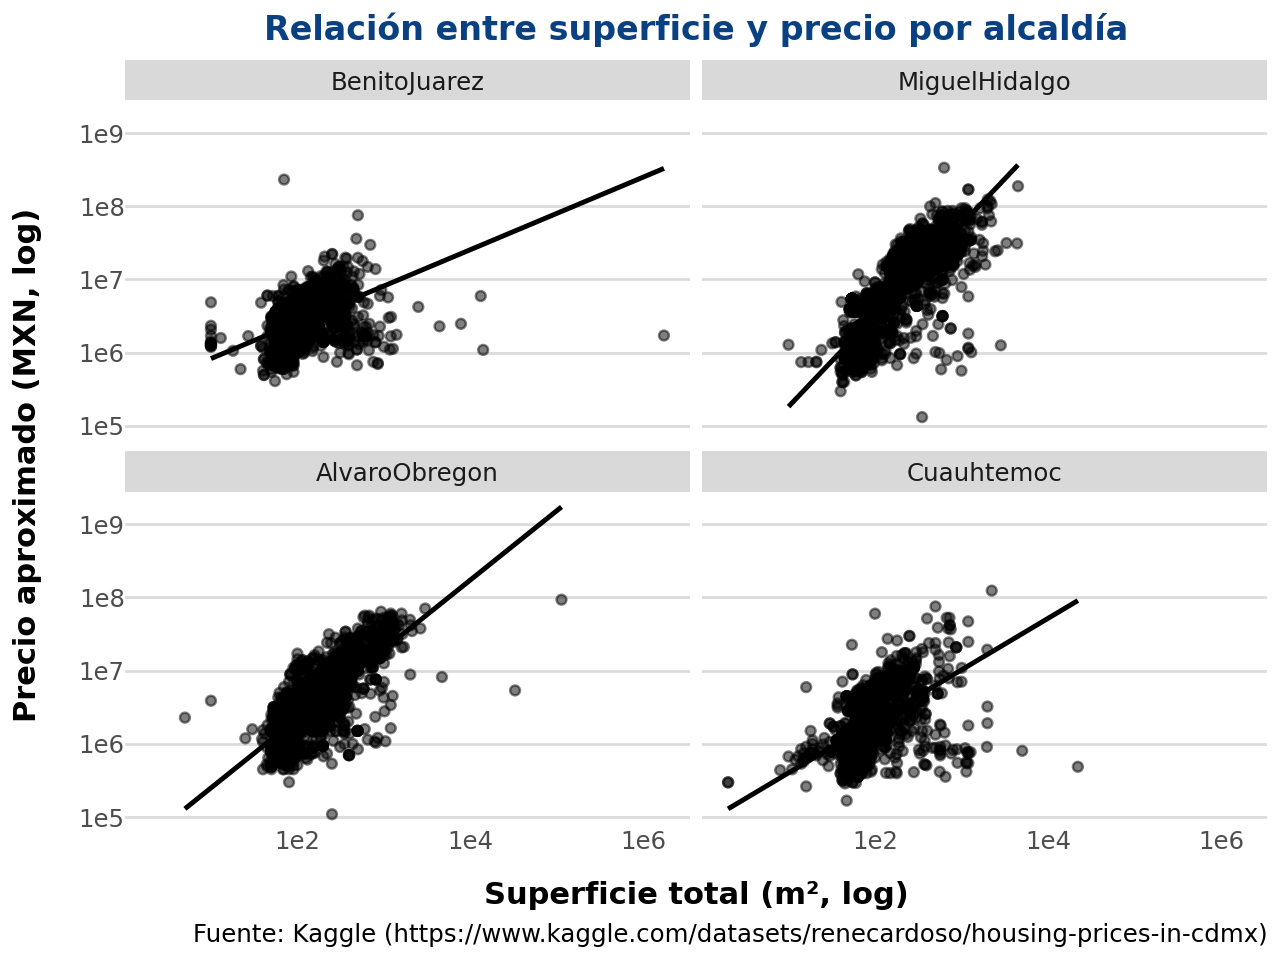

In [264]:
(ggplot(data_top, aes(x="surface_total_in_m2", y="price_aprox_local_currency")) + \
    geom_point(alpha=0.5) + \
    geom_smooth(method="lm", se=False) + \
    scale_y_log10() + scale_x_log10() + \
    labs(title="Relación entre superficie y precio por alcaldía",
         x="Superficie total (m², log)", y="Precio aproximado (MXN, log)",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+
 theme(
     legend_position="top",
     legend_title=element_text(face="bold", size=9),
     legend_text=element_text(size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_major_y=element_line(color="#dcdcdc"),
     panel_grid_minor_y=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center", color="#084081", size=12),
     axis_title_y=element_text(margin={"r":10}, face="bold"),
     axis_title_x=element_text(margin={"t":10}, face="bold")
 )+facet_wrap("places"))
#

In [265]:


data_corr = data.copy()


data_corr['log_price_local'] = np.log1p(data_corr['price_aprox_local_currency'])
data_corr['log_price_usd']   = np.log1p(data_corr['price_aprox_usd'])
data_corr['log_surface_total'] = np.log1p(data_corr['surface_total_in_m2'])
data_corr['log_surface_covered'] = np.log1p(data_corr['surface_covered_in_m2'])

# Mantener price per m² sin log, o aplicar log si hay mucha dispersión
data_corr['log_price_per_m2'] = np.log1p(data_corr['price_usd_per_m2'])
num_vars = ['log_price_local', 'log_price_usd',
            'log_surface_total', 'log_surface_covered',
            'log_price_per_m2']

corr_matrix = data_corr[num_vars].corr()
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Var1', 'Var2', 'Correlation']

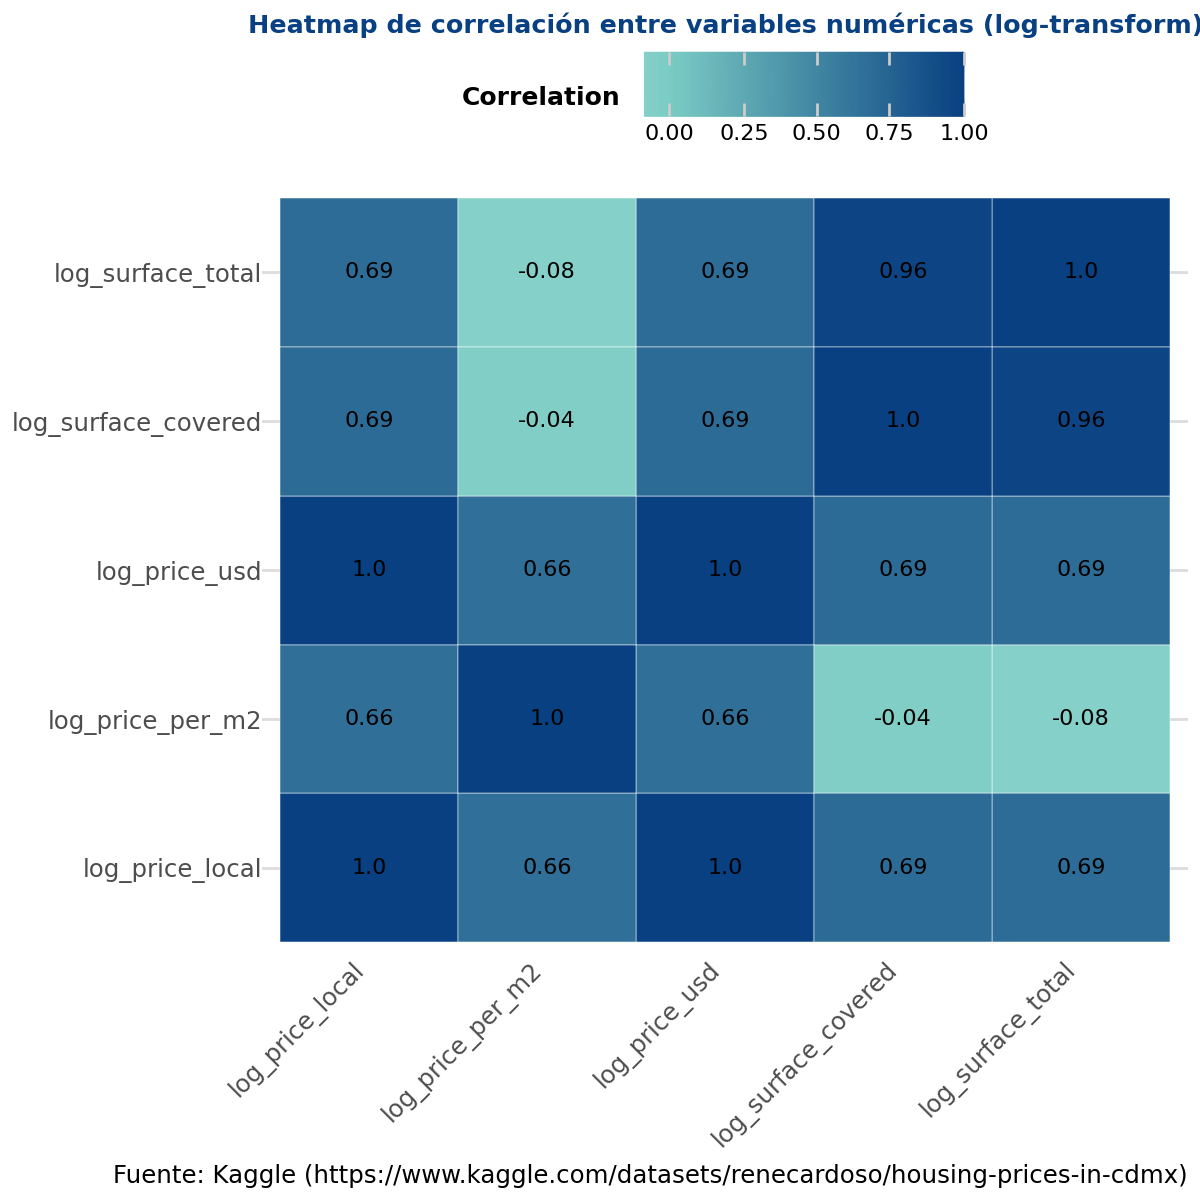

In [266]:


(
    ggplot(corr_long, aes(x='Var1', y='Var2', fill='Correlation')) +
    geom_tile(color='white') +
    scale_fill_gradient2(low='#f7fcf0', mid='#7bccc4', high='#084081', midpoint=0) +
    geom_text(aes(label=corr_long['Correlation'].round(2)), size=8) +
    theme(axis_text_x=element_text(rotation=45, hjust=1),
          axis_text_y=element_text(rotation=0),
          figure_size=(6,6)) +
    labs(title='Heatmap de correlación entre variables numéricas (log-transform)',
         x='',
         y='',caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+theme(
     legend_position="top",
     legend_title=element_text(face="bold", size=9),
     legend_text=element_text(size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_major_y=element_line(color="#dcdcdc"),
     panel_grid_minor_y=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center", color="#084081", size=9.16),
     axis_title_y=element_text(margin={"r":10}, face="bold"),
     axis_title_x=element_text(margin={"t":10}, face="bold")
 )
)

---

**Relación entre precio y superficie**

Al analizar la relación entre precio aproximado y superficie total de las propiedades, se observa que la correlación directa en valores absolutos es baja, probablemente debido a la gran dispersión de los precios y las diferencias de escala entre variables. Sin embargo, al aplicar una transformación logarítmica a ambas variables (log(precio) y log(superficie)), la correlación aumenta significativamente, indicando una relación fuertemente positiva. Esto refleja un comportamiento multiplicativo típico en bienes raíces: el precio total de una propiedad crece con su superficie, pero no de manera lineal; propiedades más grandes tienden a tener un precio por metro cuadrado menor que propiedades más pequeñas en zonas costosas, mientras que el precio total sigue aumentando proporcionalmente. Este hallazgo es consistente con la teoría inmobiliaria y sugiere que la variable superficie es un predictor importante del precio cuando se analiza en escala logarítmica. Los scatter plots log-log y el heatmap de correlación refuerzan esta conclusión, mostrando claramente la tendencia entre superficie y precio.

---

---
---
PARTE 2)
## **Estadística inferencial y supuestos**
---
---

## **Introducción al modelo de regresión**

#### Contexto
El mercado inmobiliario en la Ciudad de México presenta una alta heterogeneidad en precios, influenciada por factores como la ubicación, el tipo de propiedad y las dimensiones del inmueble.  

En este análisis, buscamos construir un modelo de regresión lineal que nos permita entender cómo las superficies de las viviendas influyen en el precio. Para comenzar, evaluaremos un modelo simple que relacione la **superficie total construida** con el **precio aproximado local en escala logarítmica**.

#### Elección de variables
- **Variable dependiente (target):**  
  `log_price_local` (transformación logarítmica del precio en moneda local).  
  Razonamiento: los precios suelen tener distribución sesgada y heterocedástica, por lo que aplicar logaritmo ayuda a estabilizar la varianza y mejorar la linealidad.

- **Variable independiente (predictor):**  
  `log_surface_total` (transformación logarítmica de la superficie total en m²).  
  Razonamiento: en teoría económica e inmobiliaria, los precios tienden a crecer de manera no lineal con el tamaño; usar log-log genera un modelo interpretable: el coeficiente estimado puede interpretarse como la **elasticidad del precio respecto a la superficie**.

## Metodología
El análisis sigue los siguientes pasos:

1. Exploración de la relación entre superficie y precio mediante visualizaciones (scatterplots en escala log-log)) .  
2. Ajuste de un modelo de regresión lineal (OLS).  
3. Evaluación de supuestos clásicos de regresión:  
   - Linealidad de la relación.  
   - Normalidad de los residuos.  
   - Homocedasticidad.  
   - Independencia de los errores.  
   - Ausencia de multicolinealidad (no aplica de forma fuerte con una sola variable, pero se revisará en caso de incluir más).  
4. Reporte de métricas clave: R², AIC, coeficientes e intervalos de confianza.  
5. Uso de errores robustos (HC3) en caso de detectar heterocedasticidad.

## Supuestos a comprobar
1. **Linealidad**: El precio logarítmico debe relacionarse linealmente con la superficie logarítmica.  
2. **Normalidad de los residuos**: Los errores deberían distribuirse normalmente alrededor de cero.  
3. **Homoscedasticidad**: La varianza de los errores debería ser constante en todo el rango de valores predichos.  
4. **Independencia**: Los errores no deben estar correlacionados entre sí (verificado con Durbin–Watson).  
5. **Multicolinealidad**: No debe existir colinealidad fuerte entre predictores (se revisa con VIF, aunque aquí solo hay un predictor).  

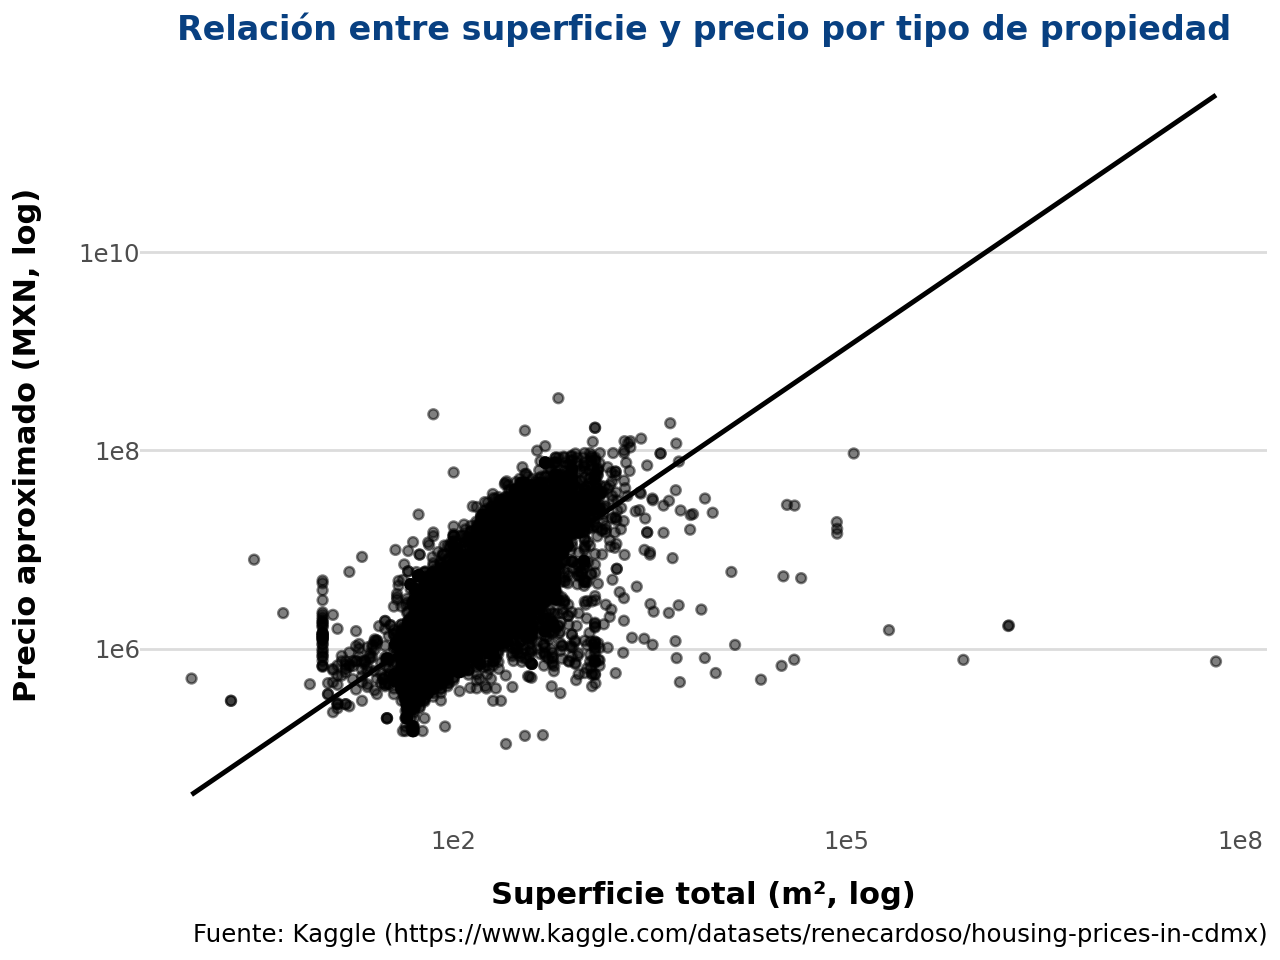

In [267]:
(ggplot(data, aes(x="surface_total_in_m2", y="price_aprox_local_currency")) + \
    geom_point(alpha=0.5) + \
    geom_smooth(method="lm", se=False) + \
    scale_y_log10() + scale_x_log10() + \
    labs(title="Relación entre superficie y precio por tipo de propiedad",
         x="Superficie total (m², log)", y="Precio aproximado (MXN, log)",caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)")+
 theme(
     legend_position="top",
     legend_title=element_text(face="bold", size=9),
     legend_text=element_text(size=8),
     legend_key=element_blank(),
     panel_background=element_rect(fill="white"),
     panel_grid_major_y=element_line(color="#dcdcdc"),
     panel_grid_minor_y=element_blank(),
     axis_ticks=element_blank(),
     plot_title=element_text(face="bold", ha="center", color="#084081", size=12),
     axis_title_y=element_text(margin={"r":10}, face="bold"),
     axis_title_x=element_text(margin={"t":10}, face="bold")
 ))
#

In [268]:

import statsmodels.api as sm
from plotnine import *
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# ------------------------
# Funciones auxiliares
# ------------------------

def compute_vif(X: pd.DataFrame):
    """Calcular VIF para detectar multicolinealidad."""
    Xc = sm.add_constant(X)
    vif = pd.Series(
        [variance_inflation_factor(Xc.values, i) for i in range(1, Xc.shape[1])],
        index=X.columns
    )
    return vif.sort_values(ascending=False)

def gaussian_tests(resid):
    """Pruebas de normalidad de residuos."""
    n = len(resid)
    sw_p = stats.shapiro(resid).pvalue if n <= 5000 else np.nan  # Shapiro no fiable si n>5000
    jb_p = stats.jarque_bera(resid).pvalue
    dagostino_p = stats.normaltest(resid).pvalue
    anderson_test = stats.anderson(resid, dist="norm")

    results = {
        "shapiro_p": sw_p,
        "jarque_bera_p": jb_p,
        "dagostino_p": dagostino_p,
        "anderson_stat": anderson_test.statistic,
        "anderson_crit": dict(zip(anderson_test.significance_level, anderson_test.critical_values))
    }
    return results

# ------------------------
# Función principal
# ------------------------

def linear_regression_v2(data, target, predictors, selection="lasso", alpha=1e-6, show_summary=True):
    """
    Ajusta un modelo OLS y devuelve diagnóstico completo.

    Parámetros:
    -----------
    data : DataFrame con los datos
    target : str, variable dependiente
    predictors : list, variables predictoras candidatas
    selection : "lasso" (selección automática) o "all" (todas las predictors)
    alpha : umbral para considerar coef distinto de 0 en Lasso
    show_summary : bool, si True imprime los resultados tipo summary

    Devuelve:
    ---------
    dict con modelo, métricas, tests, gráficos y diagnósticos
    """

    # --------------------
    # 1) Selección de variables
    # --------------------
    if selection == "lasso":
        X0 = data[predictors].select_dtypes(include=[np.number]).fillna(0)
        sc = StandardScaler()
        Xs = sc.fit_transform(X0)
        lasso = LassoCV(cv=5, random_state=42).fit(Xs, data[target])
        selected = [p for i, p in enumerate(X0.columns) if abs(lasso.coef_[i]) > alpha]
        if not selected:
            selected = predictors  # fallback si lasso no selecciona nada
    else:
        selected = predictors

    # --------------------
    # 2) Ajustar modelo
    # --------------------
    X = sm.add_constant(data[selected].fillna(0))
    y = data[target]
    model = sm.OLS(y, X).fit()
    resid = model.resid
    n, k = X.shape

    # Modelo robusto (HC3)
    robust = model.get_robustcov_results(cov_type='HC3')

    # --------------------
    # 3) Diagnósticos
    # --------------------
    normality = gaussian_tests(resid)
    bp = het_breuschpagan(resid, X)
    bp_p = bp[1]
    dw_stat = durbin_watson(resid)
    vif = compute_vif(data[selected].fillna(0))

    # --------------------
    # 4) Plots de diagnóstico
    # --------------------
    # Partial residuals
    my_palette = ['#7bccc4', '#a8ddb5', '#4eb3d3', '#084081']


    partials = []
    for name in selected:
        pr = resid + model.params[name] * data[name]
        partials.append(pd.DataFrame({"variable": name, "x": data[name], "partial": pr}))
    partial_df = pd.concat(partials, ignore_index=True)

    partial_plot = (
        ggplot(partial_df, aes(x="x", y="partial", color="variable"))
        + geom_point(size=1.5, alpha=0.6)
        + geom_smooth(method="lm", color="red", se=False)
        + facet_wrap("~variable", scales="free", ncol=2)
        + scale_color_manual(values=my_palette)
        + labs(
            title="Partial Residuals",
            subtitle="Efecto parcial de cada variable predictora",
            x="Valor de la variable",
            y="Residuales parciales",
            caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)"
        )
        + theme(
            figure_size=(10, 6),
            legend_position="top",
            legend_title=element_text(face="bold", size=8),
            legend_key=element_blank(),
            panel_background=element_rect(fill="white"),
            panel_grid_minor_x=element_blank(),
            axis_ticks=element_blank(),
            plot_title=element_text(face="bold", ha="center",
                                    color="#084081", family="Liberation Serif"),
            axis_title_y=element_text(margin={"r": 10}, face="bold"),
            axis_title_x=element_text(margin={"t": 10}, face="bold")
        )
    )

    # --------------------
    # QQ Plot
    # --------------------
    resid_df = pd.DataFrame({"resid": resid})
    qq_plot = (
        ggplot(resid_df, aes(sample="resid"))
        + geom_qq(color=my_palette[3])
        + geom_qq_line(color="red")
        + labs(
            title="QQ Plot de residuales",
            subtitle="Comparación con distribución normal",
            x="Cuantiles teóricos",
            y="Cuantiles muestrales",
            caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)"
        )
        + theme(
            figure_size=(6, 6),
            panel_background=element_rect(fill="white"),
            panel_grid_minor_x=element_blank(),
            axis_ticks=element_blank(),
            plot_title=element_text(face="bold", ha="center",
                                    color="#084081", family="Liberation Serif"),
            axis_title_y=element_text(margin={"r": 10}, face="bold"),
            axis_title_x=element_text(margin={"t": 10}, face="bold")
        )
    )

    # --------------------
    # Histograma
    # --------------------
    bins_sturges = int(np.ceil(np.log2(len(resid)) + 1))
    resid_hist = (
        ggplot(resid_df, aes(x="resid"))
        + geom_histogram(fill=my_palette[2], color="white", bins=bins_sturges)
        + labs(
            title="Histograma de residuales",
            subtitle="Distribución de residuales del modelo",
            x="Residuales",
            y="Frecuencia",
            caption="Fuente: Kaggle (https://www.kaggle.com/datasets/renecardoso/housing-prices-in-cdmx)"
        )
        + theme(
            figure_size=(6, 4),
            panel_background=element_rect(fill="white"),
            panel_grid_minor_x=element_blank(),
            axis_ticks=element_blank(),
            plot_title=element_text(face="bold", ha="center",
                                    color="#084081", family="Liberation Serif"),
            axis_title_y=element_text(margin={"r": 10}, face="bold"),
            axis_title_x=element_text(margin={"t": 10}, face="bold")
        )
    )
    # --------------------
    # 5) Output
    # --------------------
    if show_summary:
        print("="*80)
        print(" Modelo OLS")
        print("="*80)
        print(model.summary())

        print("\n" + "="*80)
        print(" Modelo OLS con errores robustos (HC3)")
        print("="*80)
        print(robust.summary())

        print("\n" + "="*80)
        print(" Diagnósticos adicionales")
        print("="*80)
        print(f"Normalidad (Jarque-Bera): p = {normality['jarque_bera_p']:.3g}")
        print(f"Breusch-Pagan p = {bp_p:.3g}")
        print(f"Durbin-Watson = {dw_stat:.3f}")
        print("\nVIF:")
        print(vif)

    # devolver también los objetos
    results = {
        "model": model,
        "robust_model": robust,
        "selected_predictors": selected,
        "normality_tests": normality,
        "bp_p": bp_p,
        "dw_stat": dw_stat,
        "vif": vif,
        "qq_plot": qq_plot,
        "resid_hist": resid_hist,
        "partial_plot": partial_plot,
    }
    return results

In [269]:
predictors = ["log_surface_total"]
results = linear_regression_v2(data_corr, target="log_price_local", predictors=predictors)

 Modelo OLS
                            OLS Regression Results                            
Dep. Variable:        log_price_local   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.636e+04
Date:                Wed, 03 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:41:01   Log-Likelihood:                -21422.
No. Observations:               18234   AIC:                         4.285e+04
Df Residuals:                   18232   BIC:                         4.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.37

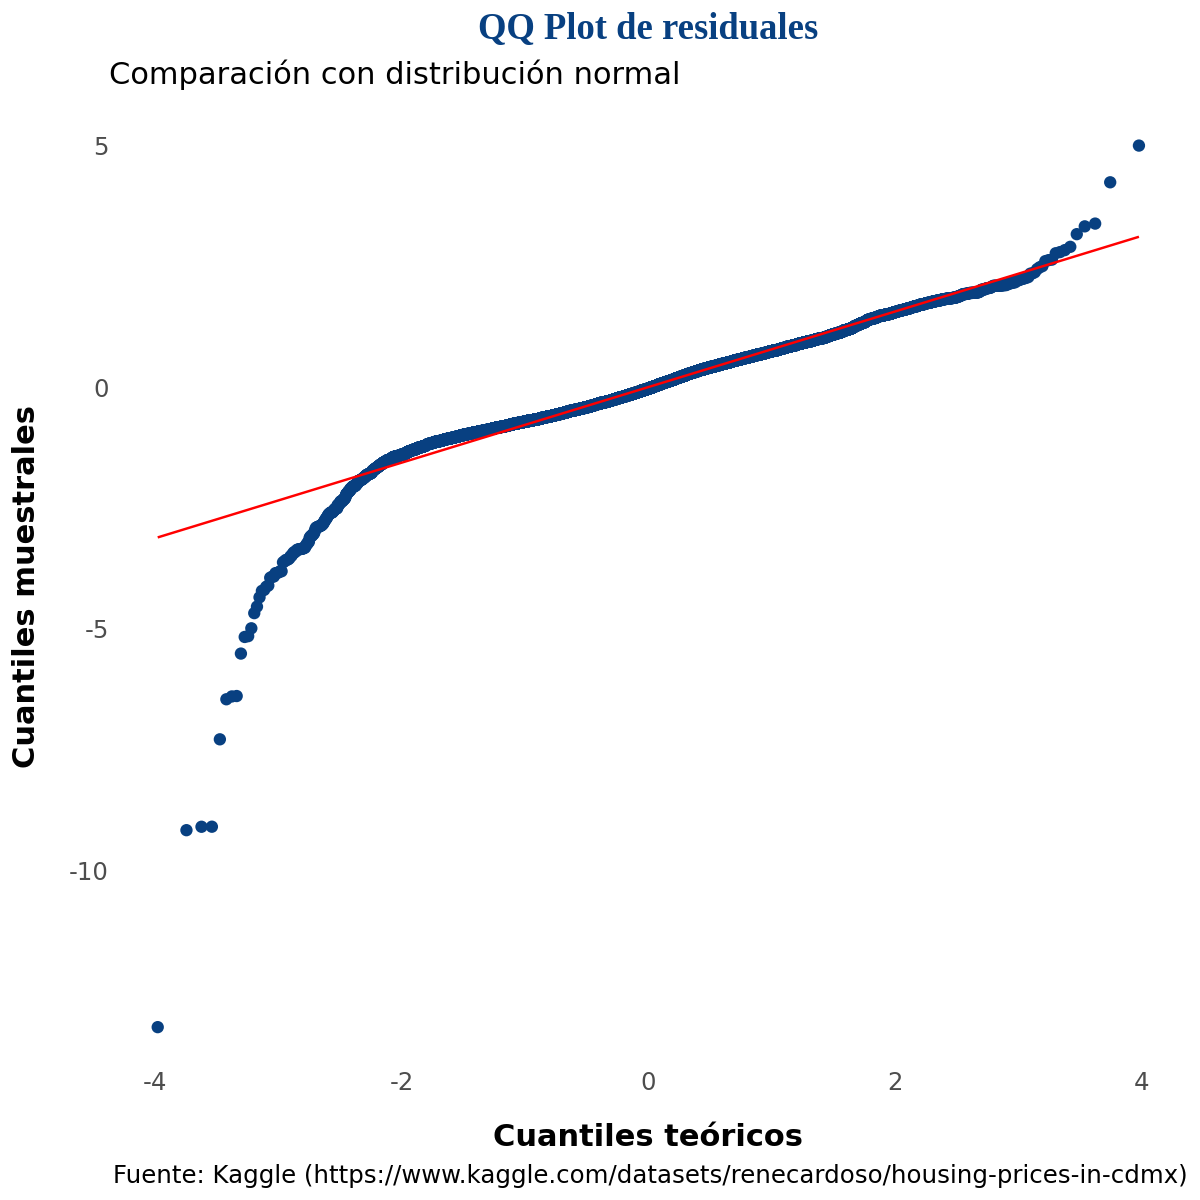

In [270]:
#GRAFICAS
results["qq_plot"]


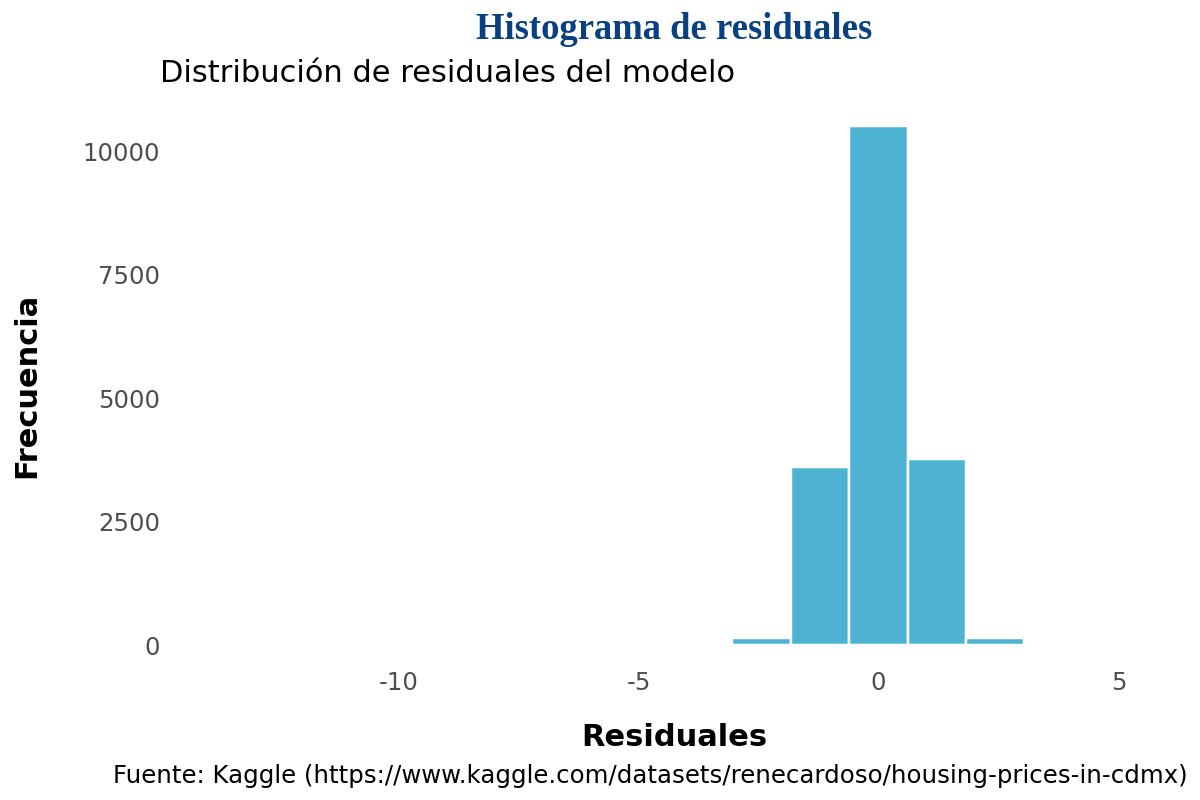

In [271]:
results["resid_hist"]

# Resultados del modelo de regresión

**Modelo OLS**

El modelo ajustado tiene como variable dependiente `log_price_local` y un único predictor `log_surface_total`.

- **R² = 0.473**  
  El modelo explica aproximadamente el 47% de la variabilidad en los precios logarítmicos de las viviendas en CDMX.  
- **R² ajustado = 0.473**  
  Como solo se incluye un predictor, el R² ajustado coincide prácticamente con el R².  
- **Estadístico F = 1.63e+04, p < 0.001**  
  El modelo es globalmente significativo.  
- **Coeficiente para `log_surface_total` = 0.91 (p < 0.001)**  
  Una elasticidad cercana a 1: por cada incremento de 1% en la superficie total, el precio aumenta en promedio un 0.91%.  
- **Intercepto = 10.38**  
  Valor esperado del logaritmo del precio cuando la superficie es mínima.

## Diagnósticos de supuestos
- **Normalidad de residuos (Jarque-Bera)**: p = 0 → se rechaza la hipótesis de normalidad. Los residuos no siguen una distribución normal.  
- **Homoscedasticidad (Breusch-Pagan)**: p = 0 → se rechaza la homocedasticidad. Existe heteroscedasticidad en los residuos.  
- **Independencia (Durbin-Watson = 2.00)**: los residuos no presentan evidencia de autocorrelación.  
- **Multicolinealidad (VIF = 1.0)**: no existe multicolinealidad, lo cual era esperado dado que el modelo solo incluye un predictor.

## Interpretación general
El modelo de regresión lineal simple confirma que la superficie total de los inmuebles es un predictor fuertemente asociado al precio. Sin embargo, los supuestos de normalidad y homocedasticidad de los residuos no se cumplen, por lo que se recomienda reportar los coeficientes con errores estándar robustos y considerar modelos adicionales que incorporen más variables explicativas para mejorar el ajuste.

# Discusión y conclusiones

El modelo de regresión lineal simple mostró que la superficie total de los inmuebles en CDMX es un predictor significativo y con una relación positiva respecto al precio. El coeficiente estimado (0.91) indica una elasticidad cercana a la unidad: en promedio, un aumento del 1% en la superficie total se asocia con un incremento del 0.91% en el precio.

A pesar de su poder explicativo moderado (R² ≈ 0.47), el modelo presenta limitaciones importantes: los residuos no cumplen con los supuestos de normalidad ni homocedasticidad, lo que puede afectar la validez de las inferencias estadísticas si se usan errores estándar convencionales. El uso de errores robustos (HC3) es recomendable para mitigar este problema.

Finalmente, dado que los precios inmobiliarios dependen de múltiples factores (ubicación, tipo de propiedad, características de la vivienda, entre otros), es necesario ampliar el modelo incluyendo más predictores para mejorar el ajuste y capturar mejor la complejidad del mercado inmobiliario en la Ciudad de México.